In [173]:
import random
import string
import RNA
import numpy as np
import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_style("white")
sns.despine()

<Figure size 432x288 with 0 Axes>

In [5]:

import pathfinder
import time
import concurrent.futures


# sequence = "AUGAACAGAUGGUACCUCGCGGCGGGGCCUGACCCAUCUACAGUUUGUGCAG"
# s1 =       "((((((((((((..(((((...)))))......))))))...))))))...."
# s2 =       ".((..((((..(((((....))..(((.....)))...)))..))))..))."

# sequence = "UGGGUCCACGCAAGCCGGCACGCGAAAGGGCGGCUAUGUACAGCUCUUAAAACCACCAGAGGUUUAGUGAUCACUGAGGCUUGUUCGCAAAUCACUGCAAUUAGAUAUGACUCACGAUAUGGGGCACGGUGCAUACAUACAAGAAUUACUUGGCACCCCCGCGGAAAGUAGUCUCCUUGUACGCAUAUCGCUACAAAAUCGGGGAACUUCCAUACAUCCUGUUAUGUGAAAUGCGACGUAGAAGCCACACACUCGUCAUUGACAGAUCUACGAAUUAUGGGUCUACUAAGAAAUUUCACAUUCCGUAGAUUCUUGUACAAGGAUAGUGACUCCGCAAUUAGGACUGAACAAUAACUUGGGCGUAAAGUAAGCGCAGGACUAGAGGAAGGCUGGUGCGCGA"
# s1 =       ".(.(((((.(..(((((.(.(......)).))))).(((.(((.((((((((((......))))..(((((((((((.((.((.........))..))..))))...))).))))......(((...(((((.......((((.....))))))))))))(((((...((.(.(((((((((((((.((((((((..((..(((....)))....))..))).).)))).))))..((((((..........(((((...))).))))))))......((((((((...(((........))).))))))))..))))))))).).))..)))))..))))))))).)))....).))))).)........(((.(.(((((.......))))).))))."
# s2 =       "((.(((((.(..((((.((.(.......))))))).(((.(((.((((((((((......))))).((((((((((..((................))...)))...))).))))......(((...(((((....................))))))))(((((...(..(.(((((((((((((.((((.(((......(((....)))........)))...)))).))))((((.((..........)))))).......((((((((....((((((((....)))....)).)))..))))))))...))))))))).)...).)))))...)))))))).)))....).))))).))......((((...(((((.......))))))))).."

# this one is better with findpath_cpp
# sequence = "GCCGCUAGAUCGAGAUGUUUAGGAUAUGCAAACAGGUCUGGGGGGUCAUGUCUUUAAAGGUCAUCAUGAGGCUCCGCCAAGACUAGAGUCCGGCCGAGCCUACCACGGCUCAUCAUGGCGCACCCUCUUAUUUUGUCAACUUGCUCUUAUCCGAACGACAACUAUCACUUGGUUACUCUGCAAUGAUUACGUACCUAGUUGGGGACGACAAUUGCUCAAUCGUUCGCGCCGUACGUGUGGCGAAGGCCUUAUGAUGAUCAAAGAGACUGGCCAGCGCCCGGAAGUACGCCGAACGGAGCG"
# s1 =       ".((.(((((((....(((((.(......)))))))))))))))(((((.((((((...(((((((((((((((.(((((........((.((((.(((((......)))))((...((((((...........))......))))...)).(((((((.(((((.....)))))..((......))...(((.(((....))).)))............))))))).)))).))...)))))..)))))))))))))))..)))))))))))..((((((.............))).)))"
# s2 =       ".((.(((((((....(((.........)))....)))))))))(((((.((((((...(((((((((((((((.((((((((..((((....((((((((......))))).....))).....))))..))).((((..((((......((((..((......))..)))).......))))))))(((((((...(.((.((((((...........)))))).))).))))))))))))..)))))))))))))))..)))))))))))..((((((.............))).)))"

# 300 nt, 190 bp_dist, 2 sections
sequence = "CAAUUGCGCCGCAUAAAACCAGAGAUUCUACCCUCAAUCGGUUCUUAAGACGUACUGCGCGUUUCACCAGACCACAAUGCAGGGCGGCACCGUUAGGCAACACAACGAGACUACUCAUGCACAUAAGGAAGGUUAUCGCCAUAGACAUGGCGCGGCAGCGCAGAAUGUUUAAAUCUAAAUCUGGUAUGGGAGGCGUGCCCGUUGGUAUGAAGAAAUUUGCUGGGAGAAAAAGUCUAAGGCCUUGAAUCCGGCGGGUCUUAAUACUUACCUACAAAAUCAUCAGGCUGUACUUCCUGUAUC"
s1 =       "......(((((.......((..(((((((.(((.(((....(((((....(((((((((((((((.(((.((((...(((..((((....))))..))).......(((....)))...........((......))....(((((((.((((....))))...)))))))..........)))).))))))))))).....))))))))))))..)))..))))))....))))..)).........)))))(((..........)))...........((((........))))...."
s2 =       "....((((((...........(((........)))....(((..(((((((.....(((((((((.(((.((((........(((((.(((...........((..(((....))).))...........)))..))))).(((((((.((((....))))...)))))))..........)))).))))))))))))(((((((..(.(((......(((.(((.......)))..)))))).)..)))))))))))))).....))).............))).)))..........."


# 600 nt, 2 sections
sequence = "UUGUGUGAUGUGCAUCGGUAGCUCGGUAAAUACGUUCGCCGGGCUUGAAGCUGUAUCCGUUGGAAUCCAAGUUGGGAGUUAUAACGUAAAACGGCAUUCCCGAUAGUCUCUCAGGGGACGAUCGAUGUUCAGGCGGCUGCGAUUUUGAACGCCGUGAAGCGUGAUUAAACCGGUCGACUUUUGCUCCUUGAAGUUUUCAUCUAUCACCUGUACUUGCGGCCACCACCUCAUUUGCCCGUUGGCCGACUCAUCGCGUGGUAGGGGUUGUCGACUGUGGGAGUUUUCAGAUUACGUCCUAACCAACCGUAAAAGAACCUCCGGUAAGAGUAAAAGGAGGGUACAGGGUACAGUAAAGACGAUAGGACAGCCGUGUGUUAGGGCCGGAAGCCGCGGGCAAAUUGACGGGACAGCACCUAGACAUACUCAAAUUAGGCCUAGCCACUAUUUGGCCGCACGCUUGUAUCAGAUUGGUCAAAGUACACUCCAUUUCUAAAGAUUUACCCCUCUAGCCCCUCCAGUGAGUGGCGCUGUCCGUUCAUAAAACUCCGUACACUCAUAUAGUCGAUGGCGAACGCGAUGUGGUGUAACCGAUUUACGUUA"
s1 =       ".....(((((((.((((((((((((((..........)))))))).((((((((...(((((...(((......)))....)))))....))))).))).((((.(((((....))))).))))....(((((((....((....))..)))).)))((.((((.((.....(..((((((........))))))..)...)))))))).......((((((.(.............).))))))(((((((((((.......(((((((((((((.((((.......(((((...........))))).....(((((.............)))))((((.((....(((......((..(((((((.((((((((((((.(....((((((.....))).)))..).)).)))).)))))).(((((..(((...)))...)))))(((((.((((..........(((............)))...(((.((........)).))).......)))).))))))))))))..)).....))))))))))))).)))))))))))))..)))))))).)))...)))))).)))))))"
s2 =       ".....(((((((.((((((((((((((..........))))))))....((((((((((((((..(((......)))......((((...(((((.....((((.(((((....))))).))))..(((((((((....))..))))))))))))...))))........((((((((....(((......))).....((((((((.........((((((.(.............).)))))).........))))))))....))))))))(((((((.........)).))))).)))))..........(((((.............))))).....)))))))))..........(((((((.(((((((..((((((((((.((((.(((((.....((......(((((...........))))).....))...))))).))))..))))........))))))..)))))))...........(((........))).(((.(((....))).))))))))))...............(((((.(((...((((.((.....)))))))))))))))))))).)))))))"


# search_width = RNA.bp_distance(s1, s2)*4

search_width = RNA.bp_distance(s1, s2)*2


def launch_fp(findpath_cmd, sequence, s1, s2, search_width):
    start_findpath = time.time()
    cmd = f'printf "{sequence}\n{s1}\n{s2}" | {findpath_cmd} -m {search_width} '
    # cmd = f'printf "{sequence}\n{s1}\n{s2}" | {findpath_cmd} -m {search_width} -v'
    result = subprocess.check_output(cmd, shell=True, encoding="utf8")    
           
    time_fp = round(time.time()-start_findpath,4)
    
    result = float(result)
    
    return time_fp, result




def launch_fp_mp(findpath_cmd, sequence, s1, s2, search_width):
    start_findpath = time.time()
    
    
    with concurrent.futures.ProcessPoolExecutor(max_workers=2) as executor:
        result = executor.map(launch_fp, [findpath_cmd, findpath_cmd], [sequence, sequence], [s1, s2], [s2, s1], [search_width, search_width])
    # result = executor.map(pathfinder_cpp.find_path, [sequence, sequence, sequence, sequence], [s1, s2, s1, s2], [s2, s1, s2, s1], [search_width, search_width,search_width, search_width])
    # result = executor.map(pathfinder_cpp.find_path, [sequence, sequence, sequence, sequence, sequence, sequence], [s1, s2, s1, s2, s1, s2], [s2, s1, s2, s1, s2, s1], [search_width, search_width, search_width, search_width, search_width, search_width])
    result = list(result)
    
           
    
    
    result = min(list(result)[0][1],list(result)[1][1])
    
    time_fp = round(time.time()-start_findpath,4)
    
    return time_fp, result
    

time_fp, result = launch_fp("./fp_single_test", sequence, s1, s2, search_width)
print ("time elapsed single s1s2 thread:", time_fp, result)

time_fp, result = launch_fp("./fp_single_test", sequence, s2, s1, search_width)
print ("time elapsed single s2s1 thread:", time_fp, result)

time_fp, result = launch_fp("./fp_multi_test", sequence, s1, s2, search_width)
print ("time elapsed inbuilt mp:", time_fp, result)

time_fp, result = launch_fp_mp("./fp_single_test", sequence, s1, s2, search_width)
print ("time elapsed inbuilt python mp:", time_fp, result)

time_fp, result = launch_fp("./findpath_orig", sequence, s1, s2, search_width)
print ("time elapsed orig c++:", time_fp, result)



start_findpath3 = time.time()
result = pathfinder.pathfinder(sequence, s1, s2, search_width=search_width, verbose=False).max_en
# print ("orig pathfinder:", orig, round (time.time()-start,4), "s")
time_fp = round(time.time()-start_findpath3,4)

print ("time elapsed th:", time_fp, result)


time elapsed single s1s2 thread: 18.594 -123.4
time elapsed single s2s1 thread: 17.2901 -114.0
time elapsed inbuilt mp: 19.5326 -123.4
time elapsed inbuilt python mp: 28.3345 -123.4
time elapsed orig c++: 27.4399 -114.0
time elapsed th: 26.6676 -114.0


In [6]:

# # o_filename = r"local_min_300_multiple_sections_min10.csv"
# # o_filename = r"local_min_400_multiple_sections_min10.csv"
# o_filename = r"local_min_500_multiple_sections_min10.csv"

# filename = r"./sample_seqs/" + o_filename

# single_1_runtimes = []
# single_1_results = []

# single_2_runtimes = []
# single_2_results = []

# mp_runtimes = []
# mp_results = []

# cpp_orig_runtimes = []
# cpp_orig_results = []

# py_runtimes = []
# py_results = []


# df = pd.read_csv(filename)
# elements = len(df.index)

# for index, row in df.iterrows():

# #     if index>=2:
# #         break
#     # if index != 7:
#     #     continue       
#     percent_complete = 100-(elements-index)/elements*100       
#     bar_length = 20
#     filled_length = int(percent_complete/100*bar_length)
#     rest = bar_length - filled_length
#     bar = "█" * filled_length + '_' * rest

#     print(f'\rComputing |{bar}| {percent_complete:.1f}% complete {index} ', end = "\r")
    
#     sequence = row.sequence
#     s1 = row.s1
#     s2 = row.s2
    
#     search_width = RNA.bp_distance(s1, s2)*2

    
#     time_fp, result = launch_fp("./fp_single_test", sequence, s1, s2, search_width)
# #     print ("time elapsed single s1s2 thread:", time_fp, result)
#     single_1_runtimes.append(time_fp)
#     single_1_results.append(result)    
    
#     time_fp, result = launch_fp("./fp_single_test", sequence, s2, s1, search_width)
# #     print ("time elapsed single s2s1 thread:", time_fp, result)
#     single_2_runtimes.append(time_fp)
#     single_2_results.append(result)    

#     time_fp, result = launch_fp("./fp_multi_test", sequence, s1, s2, search_width)
# #     print ("time elapsed inbuilt mp:", time_fp, result) 
#     mp_runtimes.append(time_fp)
#     mp_results.append(result)   

#     time_fp, result = launch_fp("./findpath_orig", sequence, s1, s2, search_width)
# #     print ("time elapsed orig c++:", time_fp, result)
#     cpp_orig_runtimes.append(time_fp)
#     cpp_orig_results.append(result)   
    
#     start_findpath3 = time.time()
#     result = pathfinder.pathfinder(sequence, s1, s2, search_width=search_width, verbose=False).max_en
#     time_fp = round(time.time()-start_findpath3,4)    
#     py_runtimes.append(time_fp)
#     py_results.append(result)   
    
  
# data = [single_1_runtimes, single_1_results, single_2_runtimes, single_2_results, mp_runtimes, mp_results, cpp_orig_runtimes, cpp_orig_results, py_runtimes, py_results]  
  
# df = pd.DataFrame(data)
# df = df.transpose() 
# df.columns = ["single_1_runtimes", "single_1_results", "single_2_runtimes", "single_2_results", "mp_runtimes", "mp_results", "cpp_orig_runtimes", "cpp_orig_results", "py_runtimes", "py_results"] 

# savefile = r"./results/" + o_filename
# df.to_csv(savefile)
# print (df)


In [103]:
# o_filename = r"local_min_400_multiple_sections_min10.csv"
# savefile = r"./results/" + o_filename
# df.to_csv(savefile)

<AxesSubplot:>

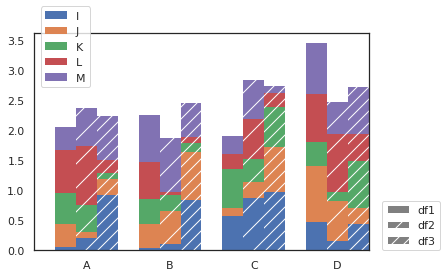

In [376]:
# https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

def plot_clustered_stacked(dfall, labels=None, title="",  H="/", **kwargs):
    """
    Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
    labels is a list of the names of the dataframe, used for the legend
    title is a string for the title of the plot
    H is the hatch used for identification of the different dataframe
    """

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

#     l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.04, 0.6])
    l1 = axe.legend(h[:n_col], l[:n_col], loc=[0.02, 0.75])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.04, 0.0]) 
    axe.add_artist(l1)
    return axe

# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])

# exmample call
plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])   

<ipython-input-376-f58a470c6c99>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axe = plt.subplot(111)


<AxesSubplot:title={'center':'Runtime comparison: Regular Findpath & modified Findpath'}, ylabel='mean runtime (s)'>

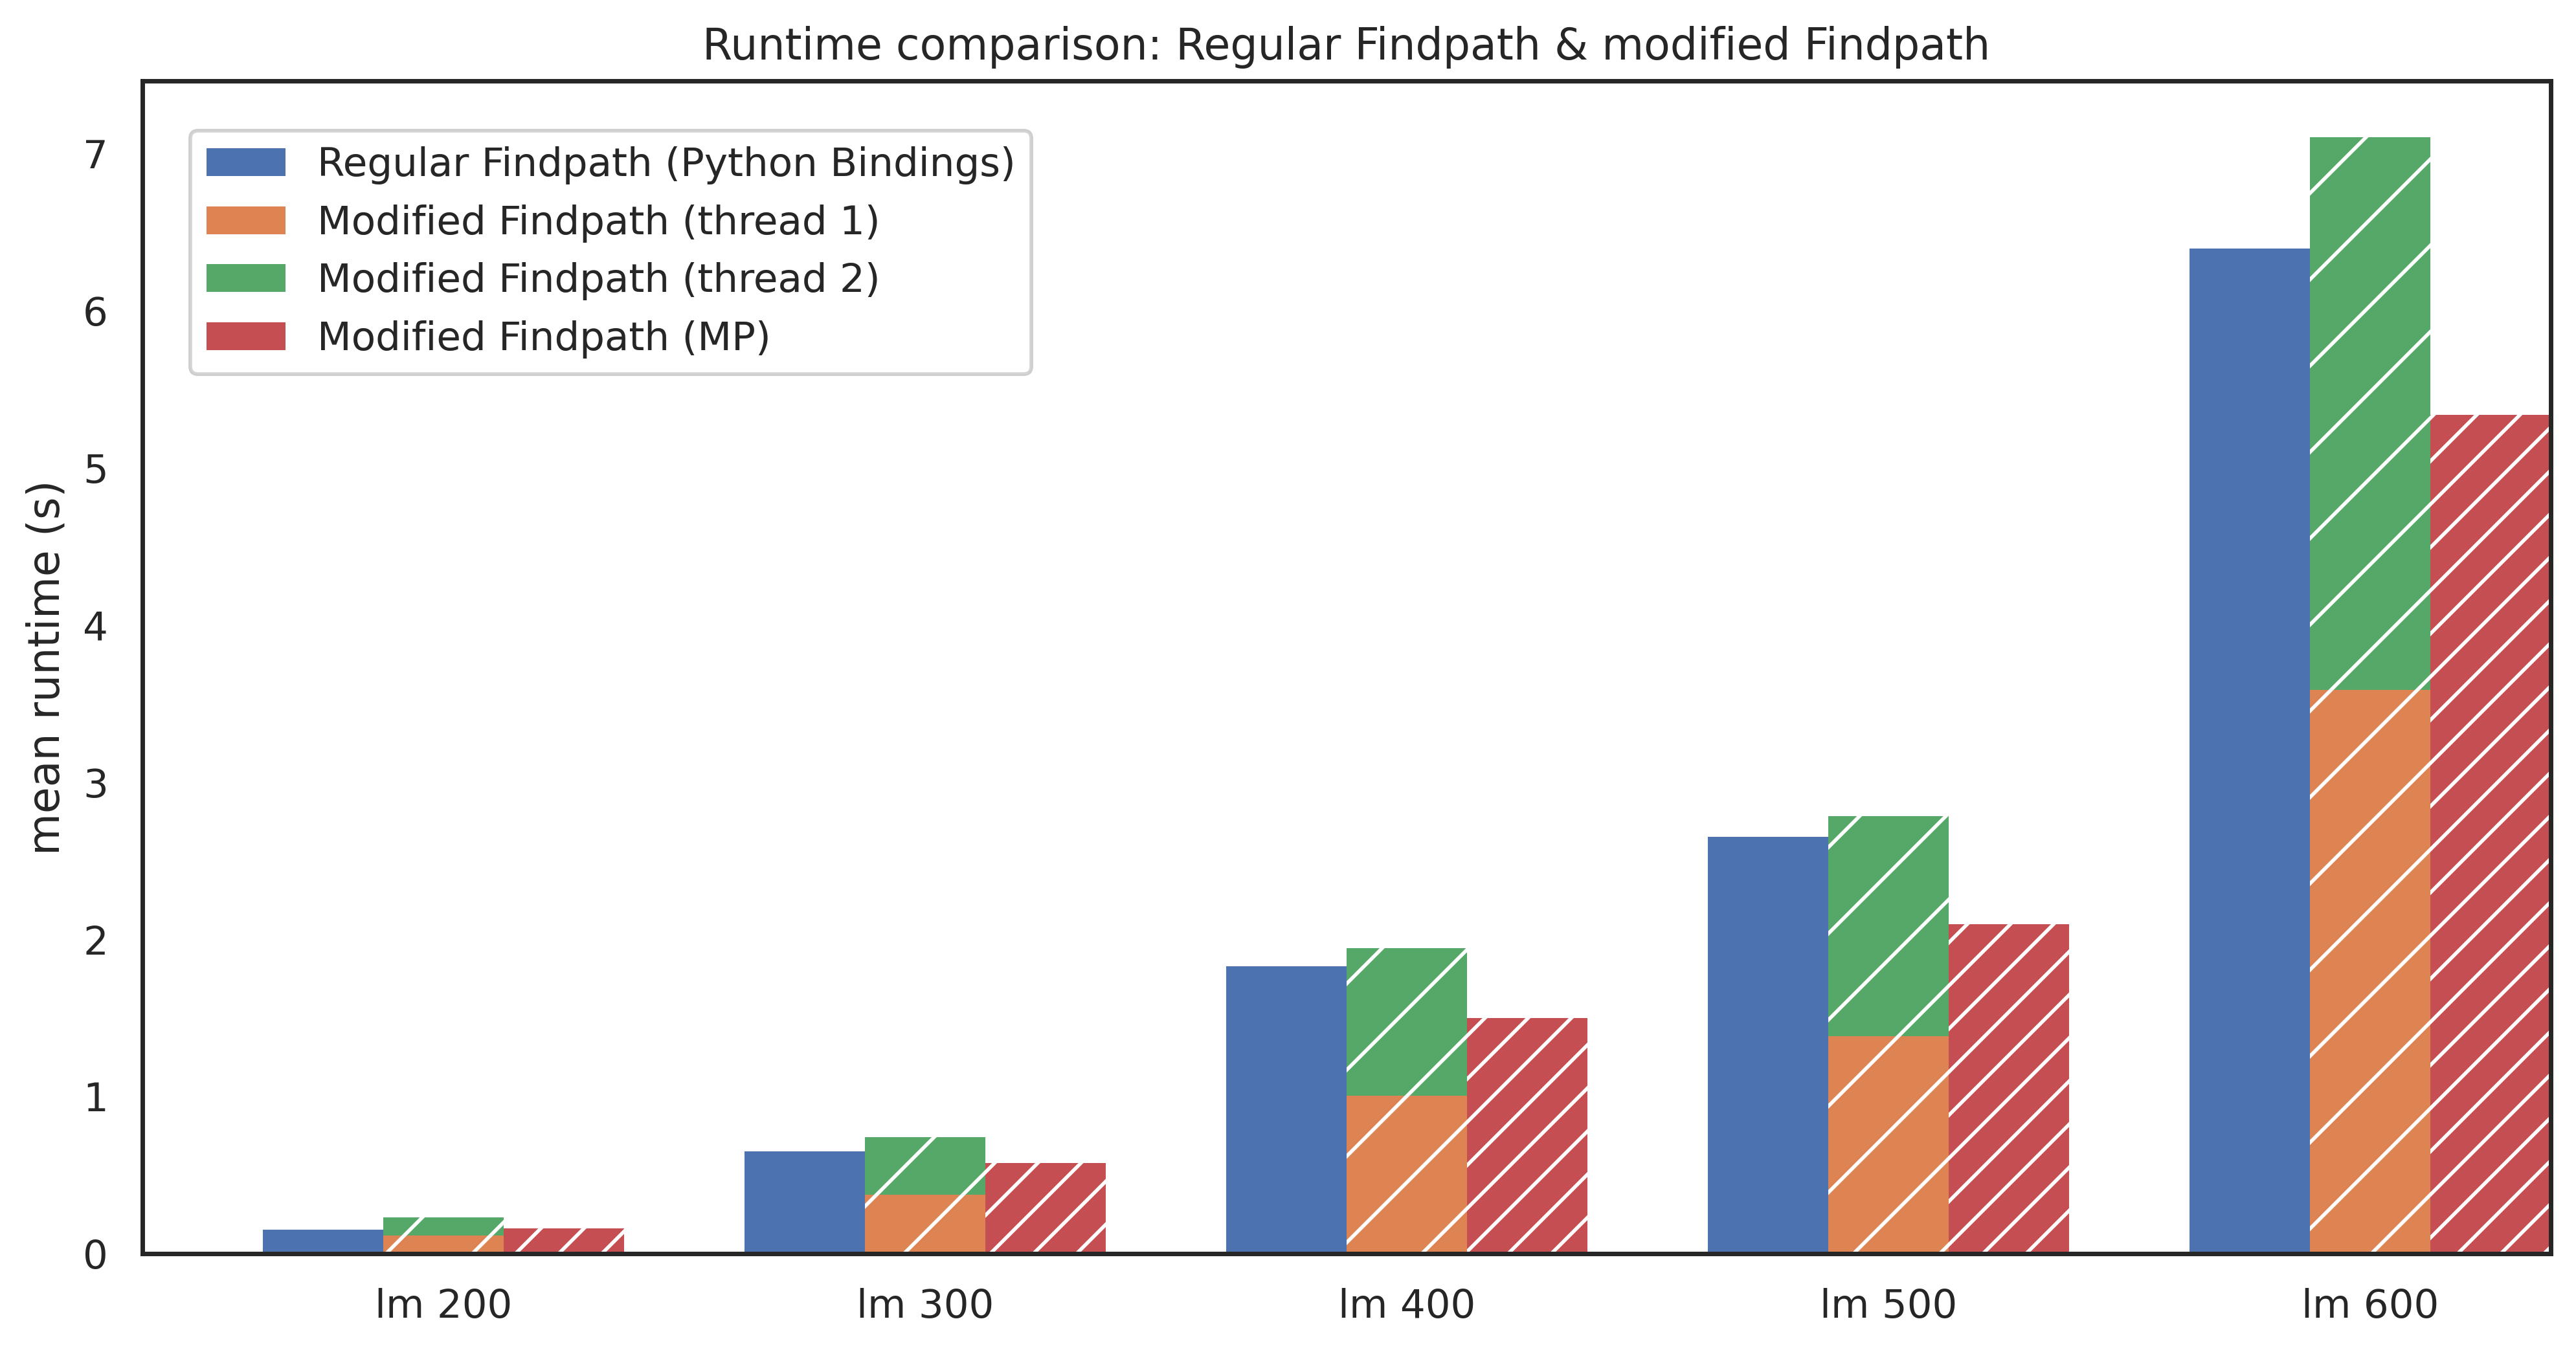

In [394]:


prefix = r"./results/"

# plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])   

df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

def add_runtime_result(filename,df1,df2,df3, name):
    df = pd.read_csv(prefix+filename)
    dfa = pd.DataFrame([df["py_runtimes"].mean(),0,0,0],
                       index=["Regular Findpath (Python Bindings)", "Modified Findpath (thread 1)", "Modified Findpath (thread 2)", "Modified Findpath (MP)"],
                       columns=[name])
    df1 = pd.concat([df1, dfa.T])
    
    
    dfb = pd.DataFrame([0, df["single_1_runtimes"].mean(), df["single_2_runtimes"].mean(),0],
                       index=["Regular Findpath (Python Bindings)", "Modified Findpath (thread 1)", "Modified Findpath (thread 2)", "Modified Findpath (MP)"],
                       columns=[name])
    df2 = pd.concat([df2, dfb.T])
    
    dfc = pd.DataFrame([0,0,0,df["mp_runtimes"].mean()],
                       index=["Regular Findpath (Python Bindings)", "Modified Findpath (thread 1)", "Modified Findpath (thread 2)", "Modified Findpath (MP)"],
                       columns=[name])
    df3 = pd.concat([df3, dfc.T])
  
    return df1, df2, df3

filename = r"3_local_min_200_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1,df2, df3, "lm 200")
filename = r"3_local_min_300_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 300")
filename = r"3_local_min_400_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 400")
filename = r"3_local_min_500_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 500")
filename = r"3_local_min_600_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 600")
# filename = r"3_local_min_800_multiple_sections_min10.csv"
# df1, df2, df3 = add_runtime_result(filename, df1, df2, df3)

plt.figure(figsize=(12, 6), dpi=400)
plt.ylabel("mean runtime (s)")
plot_clustered_stacked([df1, df2, df3], title="Runtime comparison: Regular Findpath & modified Findpath")


input: 3_local_min_300_multiple_sections_min10.csv, mp_results mean: 12.98
input: 3_local_min_300_multiple_sections_min10.csv, py_results mean: 13.09

input: 3_local_min_500_multiple_sections_min10.csv, mp_results mean: 14.56
input: 3_local_min_500_multiple_sections_min10.csv, py_results mean: 14.81



[Text(0.5, 1.0, '500 nt')]

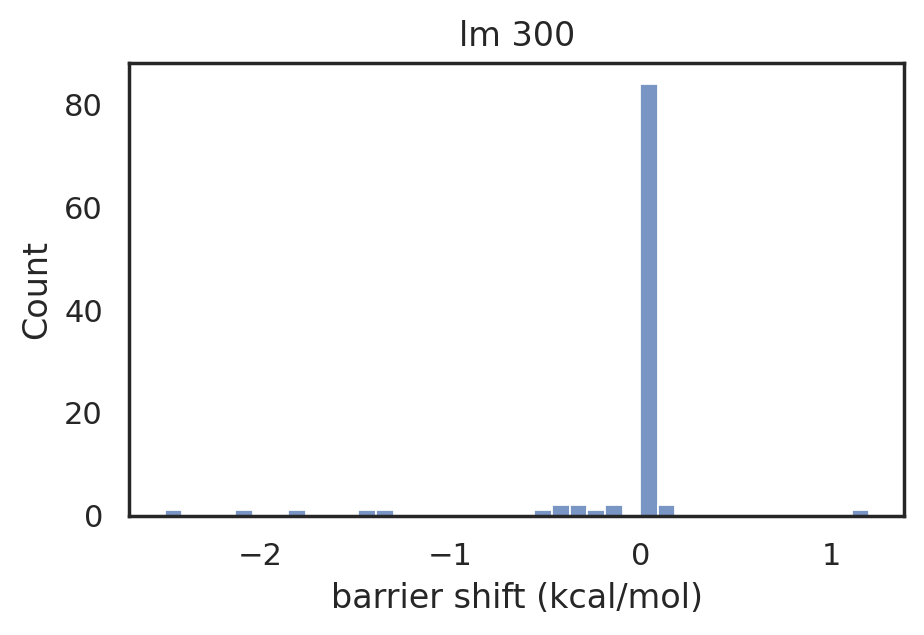

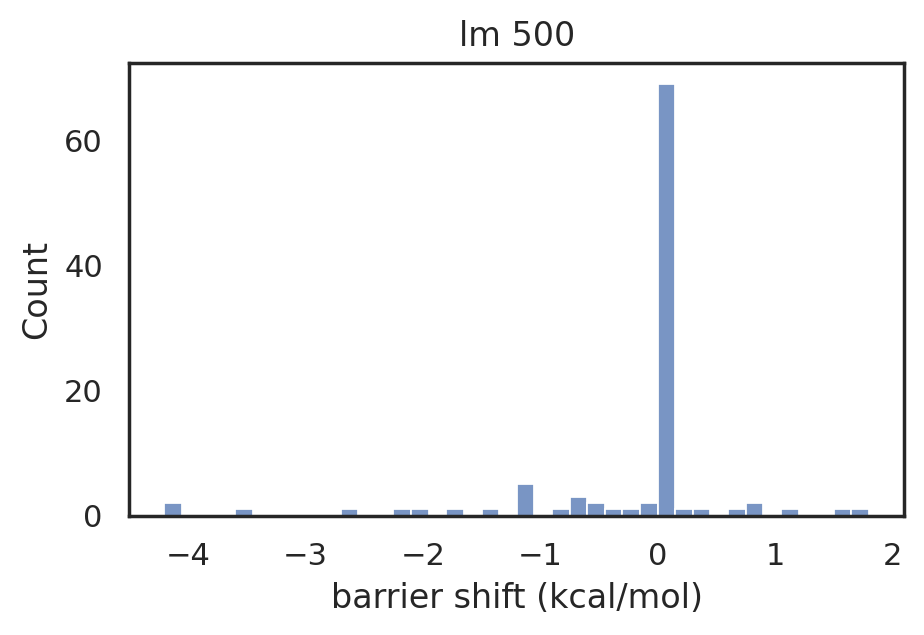

In [484]:
def df_to_histogram(df, elem1, elem2, target_axis):   
    
    print (f"input: {filename}, {elem1} mean: {df[elem1].mean():2.2f}")
    print (f"input: {filename}, {elem2} mean: {df[elem2].mean():2.2f}")
    print ()
    barrier_energy_change = df[elem1] - df[elem2]    
    axes[target_axis].set(xlabel="barrier energy shift in kcal/mol", ylim=(0, 65))
#     sns.histplot(barrier_energy_change, bins=40, ax=axes[target_axis])
    sns.histplot(barrier_energy_change, bins=40)
    

prefix = r"./results/"

plt.figure(figsize=(5, 3), dpi=200)
plt.title("lm 300")
plt.xlabel("barrier shift (kcal/mol)")
filename = r"3_local_min_300_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "mp_results", "py_results", 0)
plt.savefig("lm_300_modified.png", bbox_inches='tight')


plt.figure(figsize=(5, 3), dpi=200)
plt.title("lm 500")
plt.xlabel("barrier shift (kcal/mol)")
filename = r"3_local_min_500_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "mp_results", "py_results", 0)
plt.savefig("lm_500_modified.png", bbox_inches='tight')

axes[0].set(title="300 nt")
axes[1].set(title="500 nt")

<ipython-input-376-f58a470c6c99>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axe = plt.subplot(111)


<AxesSubplot:title={'center':'Runtime comparison: Regular Findpath & new Findpath'}, ylabel='mean runtime (s)'>

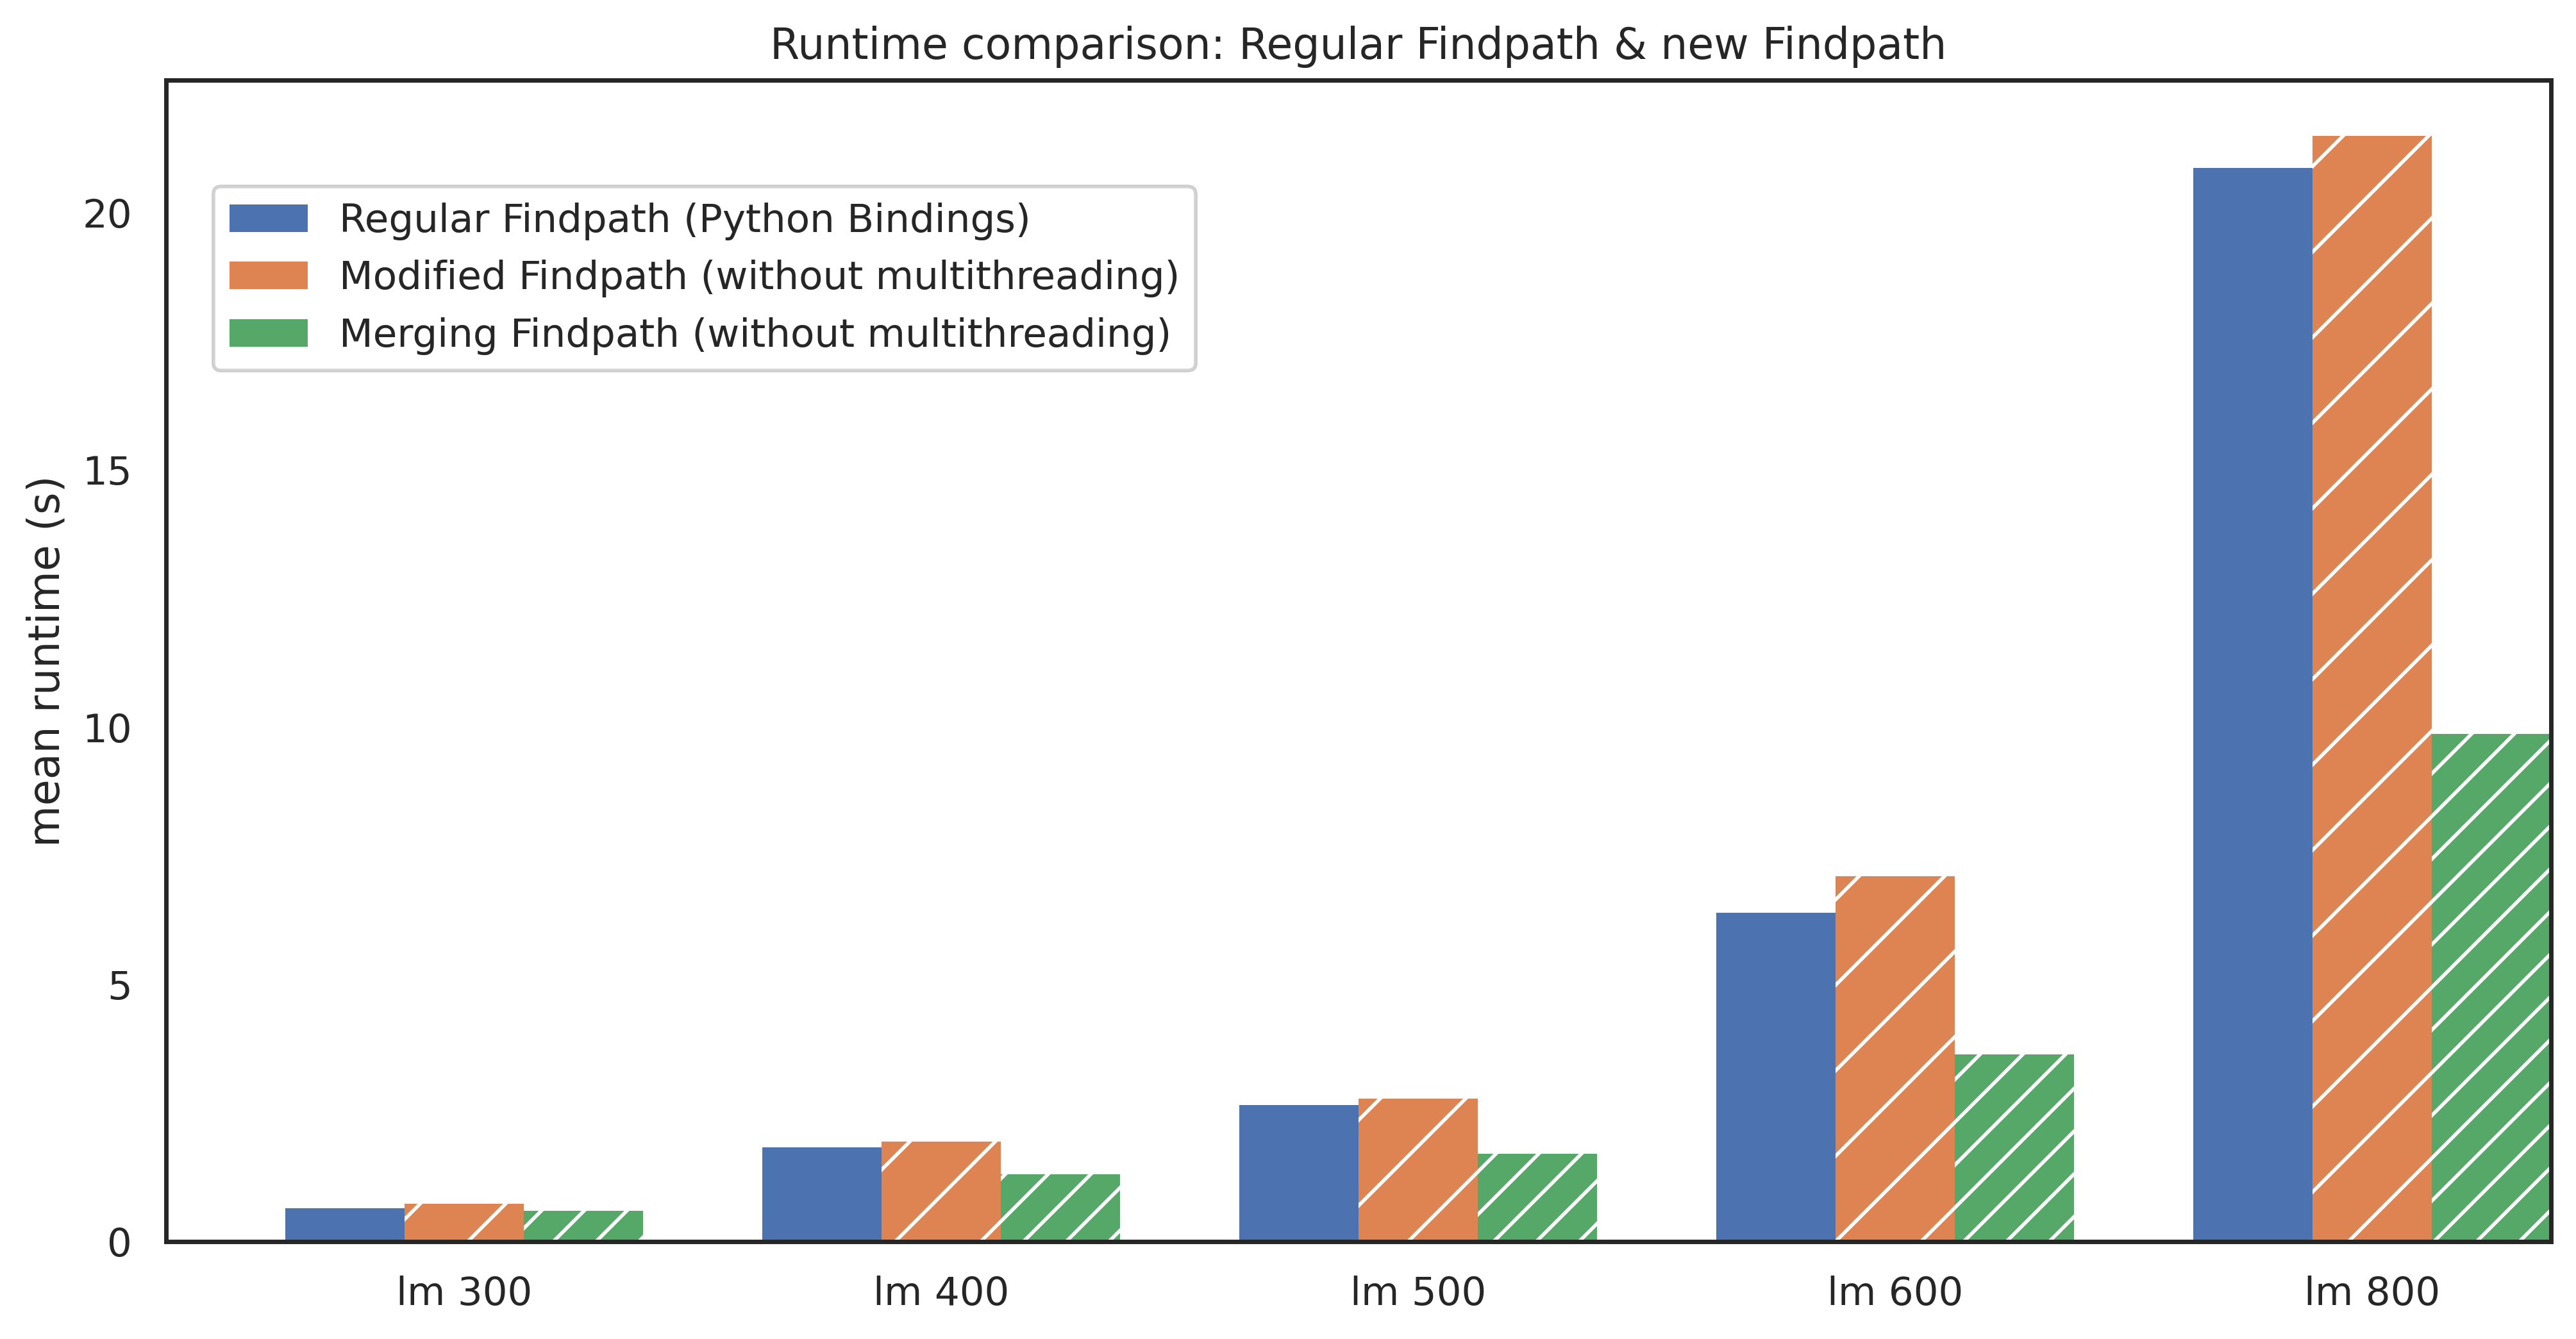

In [479]:

prefix = r"./results/"

# plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])   

df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()

def add_runtime_result(filename,df1,df2,df3, name):
    df = pd.read_csv(prefix+filename)
    dfa = pd.DataFrame([df["py_runtimes"].mean(),0,0],
                       index=["Regular Findpath (Python Bindings)", "Modified Findpath (without multithreading)", "Merging Findpath (without multithreading)"],
                       columns=[name])
    df1 = pd.concat([df1, dfa.T])
    
    
    dfb = pd.DataFrame([0, df["single_1_runtimes"].mean()+df["single_2_runtimes"].mean(),0],
                       index=["Regular Findpath (Python Bindings)", "Modified Findpath (without multithreading)", "Merging Findpath (without multithreading)"],
                       columns=[name])
    df2 = pd.concat([df2, dfb.T])
    
    dfc = pd.DataFrame([0,0,df["new_merge_runtimes"].mean()],
                       index=["Regular Findpath (Python Bindings)", "Modified Findpath (without multithreading)", "Merging Findpath (without multithreading)"],
                       columns=[name])
    df3 = pd.concat([df3, dfc.T])
  
    return df1, df2, df3


filename = r"3_local_min_300_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 300")
filename = r"3_local_min_400_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 400")
filename = r"3_local_min_500_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 500")
filename = r"3_local_min_600_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 600")
filename = r"3_local_min_800_multiple_sections_min10.csv"
df1, df2, df3 = add_runtime_result(filename, df1, df2, df3, "lm 800")

plt.figure(figsize=(12, 6), dpi=400)
plt.ylabel("mean runtime (s)")
plot_clustered_stacked([df1, df2, df3], title="Runtime comparison: Regular Findpath & new Findpath")


input: 3_local_min_300_multiple_sections_min10.csv, new_merge_results mean: 12.45
input: 3_local_min_300_multiple_sections_min10.csv, py_results mean: 13.09

input: 3_local_min_800_multiple_sections_min10.csv, new_merge_results mean: 19.23
input: 3_local_min_800_multiple_sections_min10.csv, py_results mean: 24.36



[Text(0.5, 1.0, '500 nt')]

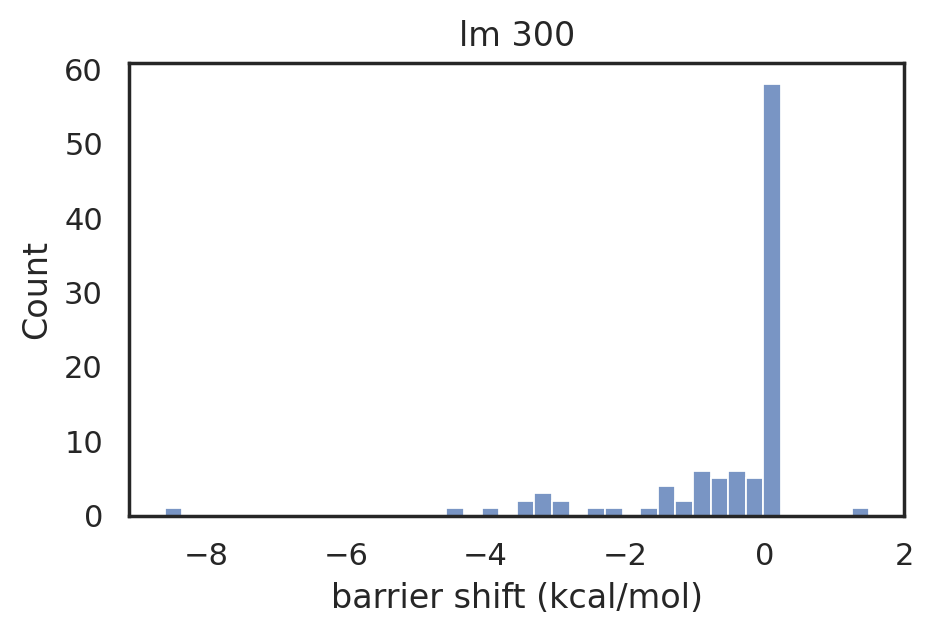

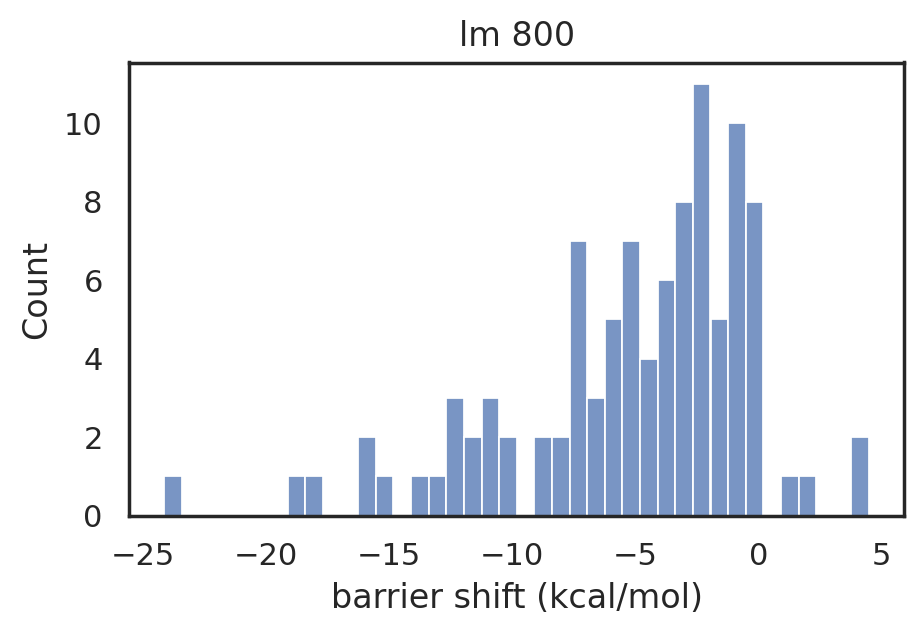

In [485]:
def df_to_histogram(df, elem1, elem2, target_axis):   
    
    print (f"input: {filename}, {elem1} mean: {df[elem1].mean():2.2f}")
    print (f"input: {filename}, {elem2} mean: {df[elem2].mean():2.2f}")
    print ()
    barrier_energy_change = df[elem1] - df[elem2]    
    axes[target_axis].set(xlabel="barrier energy shift in kcal/mol", ylim=(0, 65))
#     sns.histplot(barrier_energy_change, bins=40, ax=axes[target_axis])
    sns.histplot(barrier_energy_change, bins=40)
    

prefix = r"./results/"

plt.figure(figsize=(5, 3), dpi=200)
plt.title("lm 300")
plt.xlabel("barrier shift (kcal/mol)")
filename = r"3_local_min_300_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "new_merge_results", "py_results", 0)
plt.savefig("lm_300_merge.png", bbox_inches='tight')


plt.figure(figsize=(5, 3), dpi=200)
plt.title("lm 800")
plt.xlabel("barrier shift (kcal/mol)")
filename = r"3_local_min_800_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "new_merge_results", "py_results", 0)
plt.savefig("lm_800_merge.png", bbox_inches='tight')

axes[0].set(title="300 nt")
axes[1].set(title="500 nt")

In [281]:
df[df["old_merge_results"]>df["py_results"]]

,Unnamed: 0,i,sequence,s1,s2,search_width_multiplier,single_1_runtimes,single_1_results,single_2_runtimes,single_2_results,...,mp_results,cpp_orig_runtimes,cpp_orig_results,new_merge_runtimes,new_merge_results,old_merge_runtimes,old_merge_results,py_runtimes,py_results,bp_dist


## search width scaling

299    143
300    143
301    143
302    143
303    143
304    143
305    143
306    143
307    143
308    143
309    143
310    143
311    143
Name: bp_dist, dtype: int64


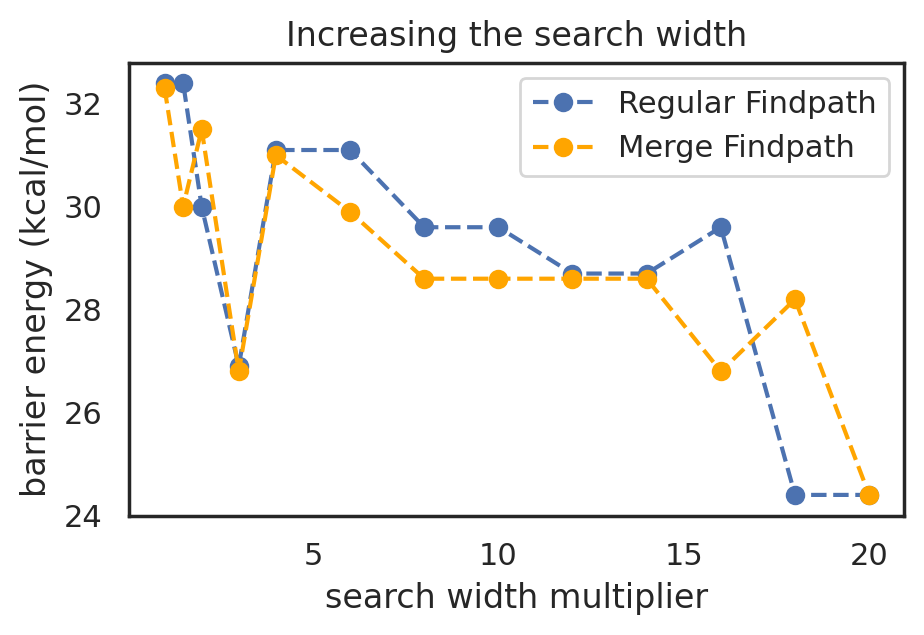

In [471]:
prefix = r"./results/"

filename = r"sw_scaling_local_min_300_multiple_sections_min10.csv"

df = pd.read_csv(prefix+filename)
# df = pd.DataFrame()

df
markers = {"Lunch": "s", "Dinner": "X"}

#23

# 16 regular

df = df[df["i"]==23]
# sns.scatterplot(data=df, x="search_width_multiplier", y="py_results", markers="X")
# sns.scatterplot(data=df, x="search_width_multiplier", y="new_merge_results")
print (df["bp_dist"])

plt.figure(figsize=(5, 3), dpi=200)
# plt.plot(df["search_width_multiplier"], df["mp_results"], linestyle='--', marker='o', color='green')
plt.plot(df["search_width_multiplier"], df["py_results"], linestyle='--', marker='o', color='b', label="Regular Findpath")
plt.plot(df["search_width_multiplier"], df["new_merge_results"], linestyle='--', marker='o', color='orange', label="Merge Findpath")
# plt.plot(df["search_width_multiplier"], df["old_merge_results"], linestyle='--', marker='o', color='red')

plt.title("Increasing the search width")
plt.xlabel("search width multiplier")
plt.ylabel("barrier energy (kcal/mol)")
plt.legend()
plt.savefig("search_width_scaling_2.png", bbox_inches='tight')

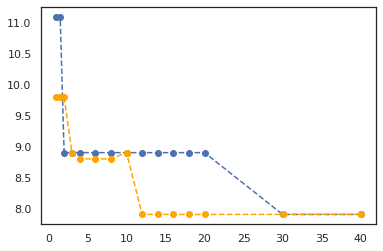

In [296]:
prefix = r"./results/"

filename = r"400_15_sw_scaling_local_min_400_multiple_sections_min10.csv"
# filename = r"400_51_sw_scaling_local_min_400_multiple_sections_min10.csv"
# filename = r"16_sw_scaling_local_min_300_multiple_sections_min10.csv"
# filename = r"17_sw_scaling_local_min_300_multiple_sections_min10.csv"

df = pd.read_csv(prefix+filename)
# df = pd.DataFrame()

df
markers = {"Lunch": "s", "Dinner": "X"}

# df = df[df["i"]==17]
# sns.scatterplot(data=df, x="search_width_multiplier", y="py_results", markers="X")
# sns.scatterplot(data=df, x="search_width_multiplier", y="new_merge_results")

# plt.plot(df["search_width_multiplier"], df["mp_results"], linestyle='--', marker='o', color='green')
plt.plot(df["search_width_multiplier"], df["py_results"], linestyle='--', marker='o', color='b')
plt.plot(df["search_width_multiplier"], df["new_merge_results"], linestyle='--', marker='o', color='orange')

input: 2local_min_300_multiple_sections_min10.csv, mp_results mean: -67.45
input: 2local_min_300_multiple_sections_min10.csv, py_results mean: -67.35

input: 2local_min_300_multiple_sections_min10.csv, new_merge_runtimes mean: 1.11
input: 2local_min_300_multiple_sections_min10.csv, py_runtimes mean: 1.26

input: 3_local_min_400_multiple_sections_min10.csv, new_merge_results mean: 14.20
input: 3_local_min_400_multiple_sections_min10.csv, py_results mean: 15.81

input: 3_local_min_500_multiple_sections_min10.csv, new_merge_results mean: 13.29
input: 3_local_min_500_multiple_sections_min10.csv, old_merge_results mean: 13.30



[Text(0.5, 1.0, '500 nt')]

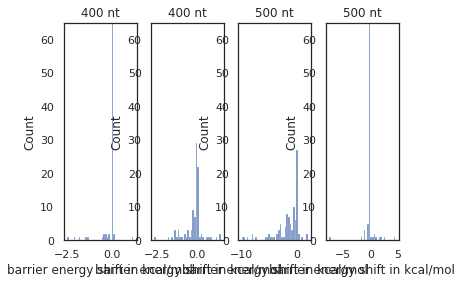

In [300]:
prefix = r"./results/"

fig, axes=plt.subplots(1,4)

filename = r"2local_min_300_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "mp_results", "py_results", 0)

filename = r"2local_min_300_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "new_merge_runtimes", "py_runtimes", 1)

filename = r"3_local_min_400_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "new_merge_results", "py_results", 2)

filename = r"3_local_min_500_multiple_sections_min10.csv"
df = pd.read_csv(prefix+filename)
df_to_histogram(df, "new_merge_results", "old_merge_results", 3)

axes[0].set(title="400 nt")
axes[1].set(title="400 nt")
axes[2].set(title="500 nt")
axes[3].set(title="500 nt")

In [133]:
dfa

,A,B,C,D
2,1.729281,0.0,0.0,0.0


In [135]:
df1+dfa

,A,B,C,D
2,NaN,NaN,NaN,NaN
local_min_400_multiple_sections_min10.csv,NaN,NaN,NaN,NaN


In [138]:
empty = pd.DataFrame()
result = pd.concat([empty, df1,dfa])
result

,A,B,C,D
local_min_400_multiple_sections_min10.csv,1.729281,0.0,0.0,0.0
2,1.729281,0.0,0.0,0.0


In [ ]:
def add_to_plot(filename, normalize=True):
    df = pd.read_csv(filename)
    runtimes_merge_findpath = df["runtimes_merge_findpath"]
    runtimes_merge_findpath_ext = df["runtimes_merge_findpath_ext"]
    
    runtimes_merge_findpath = np.sum(runtimes_merge_findpath)
    runtimes_merge_findpath_ext = np.sum(runtimes_merge_findpath_ext)
    
#     runtimes_merge_findpath_ext = df["runtimes_merge_findpath_ext"]
    runtimes_merge_join = df["runtimes_merge_join"]
    runtimes_merge_join_ext = df["runtimes_merge_join_ext"]
    
    runtimes_merge_join = np.sum(runtimes_merge_join)
    runtimes_merge_join_ext = np.sum(runtimes_merge_join_ext)
   
    runtimes_regular = df["runtimes_regular"]
    runtimes_regular_ext = df["runtimes_regular_ext"]
    
    runtimes_regular = np.sum(runtimes_regular)
    runtimes_regular_ext = np.sum(runtimes_regular_ext)
#     runtimes_regular_ext = df["runtimes_regular_ext"]

#     outer_runtimes = np.sum(outer_runtimes)
#     inner_runtimes = np.sum(inner_runtimes)
#     runtimes_merge_join = np.sum(runtimes_merge_join)

#     runtimes_regular = np.sum(runtimes_regular)

    if normalize:
        regular_findpath.append([runtimes_regular/(runtimes_regular+runtimes_regular_ext),runtimes_regular_ext/(runtimes_regular+runtimes_regular_ext),0,0])
        new_findpath.append([runtimes_merge_findpath/(runtimes_regular+runtimes_regular_ext), runtimes_merge_findpath_ext/(runtimes_regular+runtimes_regular_ext),\
                             runtimes_merge_join/(runtimes_regular+runtimes_regular_ext), runtimes_merge_join_ext/(runtimes_regular+runtimes_regular_ext)])
    else:
        regular_findpath.append([runtimes_regular, runtimes_regular_ext,0,0])
        new_findpath.append([runtimes_merge_findpath, runtimes_merge_findpath_ext, runtimes_merge_join, runtimes_merge_join_ext])
        
    print ("dataset", filename)
#     print (f"regular findpath:    avg. runtime: {np.mean(df['runtimes_regular']):4.4} s")
#     print (f"new findpath:        avg. runtime: {np.mean(df['runtimes_merge_outer'])+np.mean(df['runtimes_merge_inner']):4.4} s")
#     print (f"new findpath:  merge step runtime: {np.mean(df['runtimes_merge_join']):4.4} s")
    
    print ()

In [98]:
df["single_1_runtimes"].mean(), df["single_2_runtimes"].mean(), df["mp_runtimes"].mean(), df["py_runtimes"].mean()

(0.9589940000000001, 0.9055510000000001, 1.421471, 1.7292809999999996)

In [23]:
df["results_new"].mean(), df["results_cpp_orig"].mean(), df["results_py"].mean()

(-66.73200000000001, -67.1042, -67.1042)

In [48]:
df["results_new"].mean(), df["time_new"].mean(), df["results_cpp_orig"].mean(), df["time_cpp_orig"].mean(), df["results_py"].mean(), df["time_py"].mean()

(-67.46020000000001,
 0.8481089999999999,
 -67.3495,
 0.6598469999999999,
 -67.3495,
 0.621498)

In [50]:
df["results_new"].mean(), df["time_new"].mean(), df["results_cpp_orig"].mean(), df["time_cpp_orig"].mean(), df["results_py"].mean(), df["time_py"].mean()

(-67.44220000000001,
 0.7985259999999998,
 -67.3495,
 0.660056,
 -67.3495,
 0.624502)

input: ./sample_seqs/local_min_300_multiple_sections_min10.csv, regular findpath mean barrier: -67.44 kcal/mol
input: ./sample_seqs/local_min_300_multiple_sections_min10.csv,     new findpath mean barrier: -67.35 kcal/mol

input: ./sample_seqs/local_min_300_multiple_sections_min10.csv, regular findpath mean barrier: 0.80 kcal/mol
input: ./sample_seqs/local_min_300_multiple_sections_min10.csv,     new findpath mean barrier: 0.62 kcal/mol



[Text(0.5, 1.0, '400 nt')]

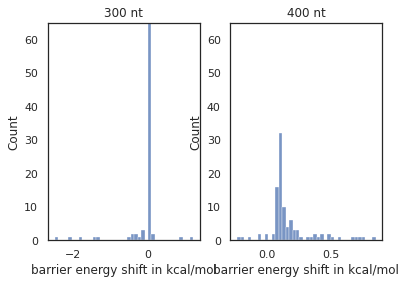

In [58]:
fig, axes=plt.subplots(1,2)
df_to_histogram(df, "results_new", "results_py", 0)
df_to_histogram(df, "time_new", "time_py", 1)
axes[0].set(title="300 nt")
axes[1].set(title="400 nt")

In [73]:
df["results_new"].mean(), df["time_new"].mean(), df["results_cpp_orig"].mean(), df["time_cpp_orig"].mean(), df["results_py"].mean(), df["time_py"].mean()

(-67.44980000000001,
 0.490906,
 -67.3495,
 0.6629570000000001,
 -67.3495,
 0.6263399999999999)

KeyError: 'results_new'

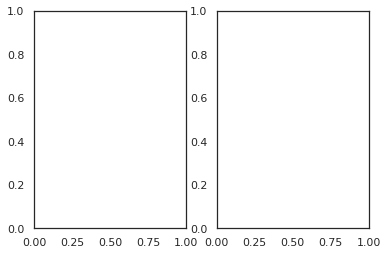

In [412]:
def df_to_histogram(df, elem1, elem2, target_axis):   
    
    print (f"input: {filename}, {elem1} mean: {df[elem1].mean():2.2f}")
    print (f"input: {filename}, {elem2} mean: {df[elem2].mean():2.2f}")
    print ()
    barrier_energy_change = df[elem1] - df[elem2]    
    axes[target_axis].set(xlabel="barrier energy shift in kcal/mol", ylim=(0, 65))
    sns.histplot(barrier_energy_change, bins=40, ax=axes[target_axis])
    

fig, axes=plt.subplots(1,2)
df_to_histogram(df, "results_new", "results_py", 0)
df_to_histogram(df, "time_new", "time_py", 1)
axes[0].set(title="300 nt")
axes[1].set(title="400 nt")

In [76]:
df["results_new"].mean(), df["time_new"].mean(), df["results_cpp_orig"].mean(), df["time_cpp_orig"].mean(), df["results_py"].mean(), df["time_py"].mean()

(-95.669,
 1.246908,
 -95.39329999999998,
 1.7670829999999997,
 -95.39329999999998,
 1.7170030000000003)

input: ./sample_seqs/local_min_400_multiple_sections_min10.csv, regular findpath mean barrier: -95.67 kcal/mol
input: ./sample_seqs/local_min_400_multiple_sections_min10.csv,     new findpath mean barrier: -95.39 kcal/mol

input: ./sample_seqs/local_min_400_multiple_sections_min10.csv, regular findpath mean barrier: 1.25 kcal/mol
input: ./sample_seqs/local_min_400_multiple_sections_min10.csv,     new findpath mean barrier: 1.72 kcal/mol



[Text(0.5, 1.0, '400 nt')]

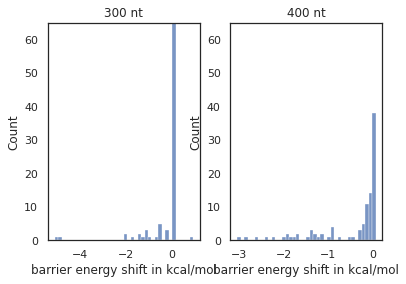

In [77]:
fig, axes=plt.subplots(1,2)
df_to_histogram(df, "results_new", "results_py", 0)
df_to_histogram(df, "time_new", "time_py", 1)
axes[0].set(title="300 nt")
axes[1].set(title="400 nt")

# Examples...

### updated recursive section scanner

In [20]:
# simple example
sequence = "GAGGUGUAGUCCAGCCCUUAUUUGUUACCCGGCCGAUCCGAGAUAUGCACGUACGUCCAA"
s1 =       "((.(((((....(((........)))..(((.......)).)...))))).).)......"
s2 =       "((((.((......))))))..........(((.....)))...................."

sections = merge_composition.merge_check(sequence, s1, s2, Debug=False)
print (sections)
search_width_multiplier = 2
r = merge_recursive.recursive_merge(sequence, s1, s2, sections, search_width_multiplier=search_width_multiplier,\
    Verbose=True, new=True)

[1, [30, 40], 60]
Findpath outer section: [1, 60] excluding [[30, 40]] 
GAGGUGUAGUCCAGCCCUUAUUUGUUACCCGGCCGAUCCGAGAUAUGCACGUACGUCCAA
((.(((((....(((........)))..((.........).)...))))).).)...... [   0,    0 ]   2.00
.(.(((((....(((........)))..((.........).)...))))).)........ [  -1,  -54 ]   1.70
.(.(((((....(((........)))...(.........).....))))).)........ [ -29,  -42 ]   1.20
.(.((((.....(((........)))...(.........)......)))).)........ [  -8,  -46 ]   2.20
...((((.....(((........)))...(.........)......)))).......... [  -2,  -52 ]   2.60
...(((......(((........)))...(.........).......))).......... [  -7,  -47 ]   4.30
...((.......(((........)))...(.........)........)).......... [  -6,  -48 ]   7.20
...(........(((........)))...(.........).........).......... [  -5,  -49 ]   8.60
............(((........)))...(.........).................... [  -4,  -50 ]   4.70
.............((........))....(.........).................... [ -13,  -26 ]   5.40
..............(........).....(.........).......

In [442]:
# Recursive Merging

# sequence = "UCGUGUAACCCGGGCCCCAUUAUGAAGUCCUUGGCACACGAUAGAUAGCACUGUGCAAGGUGUCCCAUUGACAGGUUUCGCAUAGGUCAG"
# s1 =       "((((((..((.(((.(..........).))).)).))))))......(..((((((.(((((((.....))))..))).))))))..).."
# s2 =       "((((((...((((((..((...))..).)).))).))))))......((.((((((....((((.....))))......))))))))..."

# sections = merge_composition.merge_check(sequence, s1, s2, Debug=False)
# print (sections)
# search_width_multiplier = 2
# r = merge_recursive.recursive_merge(sequence, s1, s2, sections, search_width_multiplier=search_width_multiplier,\
#     Verbose=True, new=True)

# print (r.max_en, "runtimes:",  round(r.runtime,2), round(r.runtime_ext,2), round(r.runtime_merge,2), "s")

# Dataset generation:

- 1000 sequences of lengths 50,100,150,200,300,400,500,600,800,1000
- RNAsubopt --> gradient walk of s1 & s2 to direct local minimum
- filter s1 <-> s2 if minimum basepair distance below 10


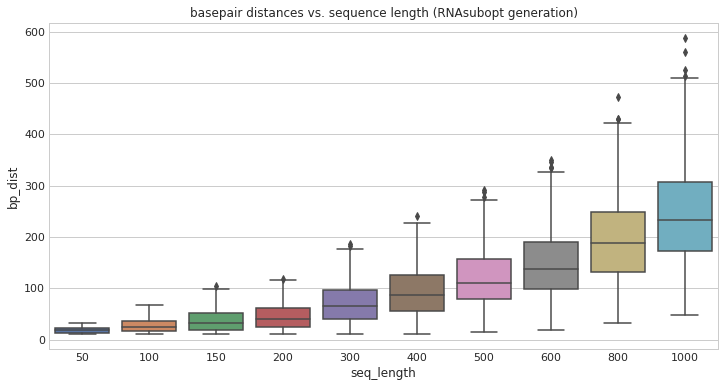

In [35]:
# filename = "../../sample_seqs/scanned_sections_2.csv"
filename = "../../sample_seqs/scanned_sections_aggressive.csv"



df = pd.read_csv(filename)

sns.set(rc={'figure.figsize':(12,6)})
plt.style.use('seaborn-whitegrid')
plt.title("basepair distances vs. sequence length (RNAsubopt generation)")
sns.boxplot(x="seq_length", y="bp_dist", data=df)
# plt.show()
plt.savefig("bp_dist_distribution.png", dpi=300)

[9.4, 41.4, 65.5, 75.6, 87.7, 94.0, 96.5, 97.4, 98.9, 99.3] [0.9716412367774983, 0.8834573662884646, 0.8087828767855278, 0.7736487422004537, 0.7168373128529828, 0.668231916301946, 0.6492116700930048, 0.6283678179710002, 0.5828256995309631, 0.5567607743826464]


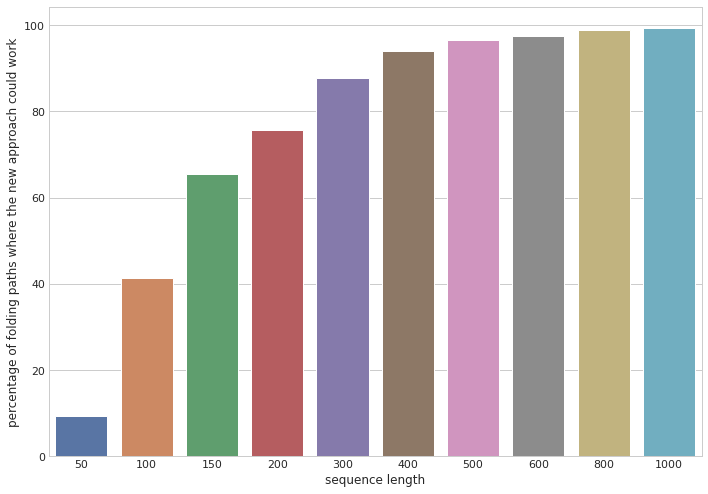

In [23]:
seq_lengths = [50,100,150,200,300,400,500,600,800,1000]

l = []
ls = []

for sl in seq_lengths:   
    l.append(np.sum(df.where(df["seq_length"]==sl)["recursion_depth"]>1)/10)
    ls.append(np.mean(df.where(df["seq_length"]==sl)["largest_section"]/df.where(df["seq_length"]==sl)["bp_dist"]   ))
    
print (l, ls)
    
ax = sns.barplot(x=seq_lengths, y=l)
ax.set(xlabel='sequence length', ylabel='percentage of folding paths where the new approach could work')
plt.show()


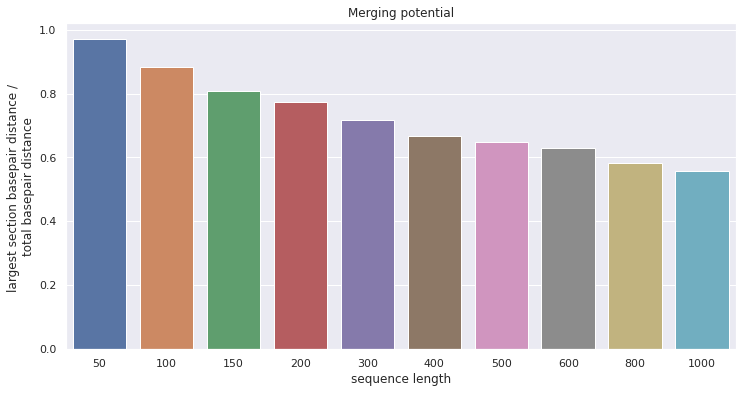

In [32]:
# percentage of the largest section (largest bp_dist / total bp_dist)

sns.set(rc={'figure.figsize':(12,6)})
ax = sns.barplot(x=seq_lengths, y=ls)
ax.set(xlabel='sequence length', ylabel='largest section basepair distance / \ntotal basepair distance')
plt.title("Merging potential")
# plt.show()
plt.savefig("merging_potential.png", dpi=300)


<AxesSubplot:title={'center':'Merging potential'}, xlabel='seq_length', ylabel='p'>

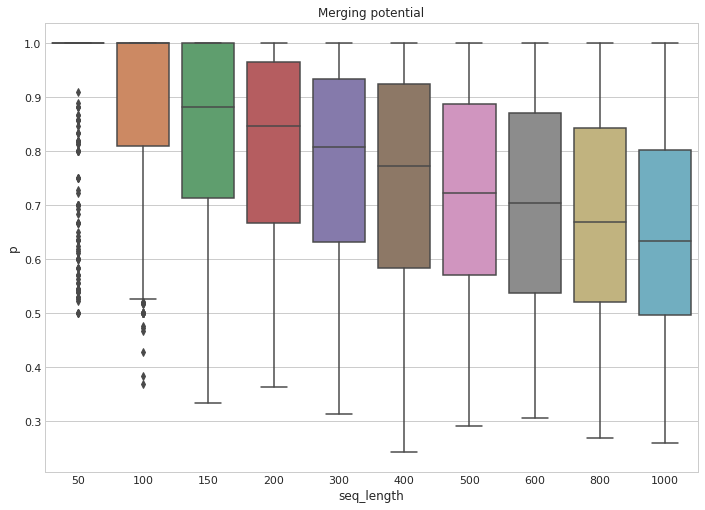

In [9]:
df["p"] = df["largest_section"]/df["bp_dist"]

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('seaborn-whitegrid')
plt.title("Merging potential")
sns.boxplot(x="seq_length", y="p", data=df)

# Runtime comparison

In [37]:
# https://stackoverflow.com/questions/22787209/how-to-have-clusters-of-stacked-bars-with-python-pandas

def plot_clustered_stacked(dfall, labels=None, title="",  H="/", **kwargs):
    """
    Given a list of dataframes, with identical columns and index, create a clustered stacked bar plot. 
    labels is a list of the names of the dataframe, used for the legend
    title is a string for the title of the plot
    H is the hatch used for identification of the different dataframe
    """

    n_df = len(dfall)
    n_col = len(dfall[0].columns) 
    n_ind = len(dfall[0].index)
    axe = plt.subplot(111)

    for df in dfall : # for each data frame
        axe = df.plot(kind="bar",
                      linewidth=0,
                      stacked=True,
                      ax=axe,
                      legend=False,
                      grid=False,
                      **kwargs)  # make bar plots

    h,l = axe.get_legend_handles_labels() # get the handles we want to modify
    for i in range(0, n_df * n_col, n_col): # len(h) = n_col * n_df
        for j, pa in enumerate(h[i:i+n_col]):
            for rect in pa.patches: # for each index
                rect.set_x(rect.get_x() + 1 / float(n_df + 1) * i / float(n_col))
                rect.set_hatch(H * int(i / n_col)) #edited part     
                rect.set_width(1 / float(n_df + 1))

    axe.set_xticks((np.arange(0, 2 * n_ind, 2) + 1 / float(n_df + 1)) / 2.)
    axe.set_xticklabels(df.index, rotation = 0)
    axe.set_title(title)

    # Add invisible data to add another legend
    n=[]        
    for i in range(n_df):
        n.append(axe.bar(0, 0, color="gray", hatch=H * i))

    l1 = axe.legend(h[:n_col], l[:n_col], loc=[1.04, 0.6])
    if labels is not None:
        l2 = plt.legend(n, labels, loc=[1.04, 0.0]) 
    axe.add_artist(l1)
    return axe

# create fake dataframes
df1 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df2 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"],
                   columns=["I", "J", "K", "L", "M"])
df3 = pd.DataFrame(np.random.rand(4, 5),
                   index=["A", "B", "C", "D"], 
                   columns=["I", "J", "K", "L", "M"])

# exmample call
# plot_clustered_stacked([df1, df2, df3],["df1", "df2", "df3"])    

In [38]:
def add_to_plot(filename, normalize=True):
    df = pd.read_csv(filename)
    runtimes_merge_findpath = df["runtimes_merge_findpath"]
    runtimes_merge_findpath_ext = df["runtimes_merge_findpath_ext"]
    
    runtimes_merge_findpath = np.sum(runtimes_merge_findpath)
    runtimes_merge_findpath_ext = np.sum(runtimes_merge_findpath_ext)
    
#     runtimes_merge_findpath_ext = df["runtimes_merge_findpath_ext"]
    runtimes_merge_join = df["runtimes_merge_join"]
    runtimes_merge_join_ext = df["runtimes_merge_join_ext"]
    
    runtimes_merge_join = np.sum(runtimes_merge_join)
    runtimes_merge_join_ext = np.sum(runtimes_merge_join_ext)
   
    runtimes_regular = df["runtimes_regular"]
    runtimes_regular_ext = df["runtimes_regular_ext"]
    
    runtimes_regular = np.sum(runtimes_regular)
    runtimes_regular_ext = np.sum(runtimes_regular_ext)
#     runtimes_regular_ext = df["runtimes_regular_ext"]

#     outer_runtimes = np.sum(outer_runtimes)
#     inner_runtimes = np.sum(inner_runtimes)
#     runtimes_merge_join = np.sum(runtimes_merge_join)

#     runtimes_regular = np.sum(runtimes_regular)

    if normalize:
        regular_findpath.append([runtimes_regular/(runtimes_regular+runtimes_regular_ext),runtimes_regular_ext/(runtimes_regular+runtimes_regular_ext),0,0])
        new_findpath.append([runtimes_merge_findpath/(runtimes_regular+runtimes_regular_ext), runtimes_merge_findpath_ext/(runtimes_regular+runtimes_regular_ext),\
                             runtimes_merge_join/(runtimes_regular+runtimes_regular_ext), runtimes_merge_join_ext/(runtimes_regular+runtimes_regular_ext)])
    else:
        regular_findpath.append([runtimes_regular, runtimes_regular_ext,0,0])
        new_findpath.append([runtimes_merge_findpath, runtimes_merge_findpath_ext, runtimes_merge_join, runtimes_merge_join_ext])
        
    print ("dataset", filename)
#     print (f"regular findpath:    avg. runtime: {np.mean(df['runtimes_regular']):4.4} s")
#     print (f"new findpath:        avg. runtime: {np.mean(df['runtimes_merge_outer'])+np.mean(df['runtimes_merge_inner']):4.4} s")
#     print (f"new findpath:  merge step runtime: {np.mean(df['runtimes_merge_join']):4.4} s")
    
    print ()

dataset local_min_300_multiple_sections_min10.csv_benchmark.csv

dataset local_min_400_multiple_sections_min10.csv_benchmark.csv

dataset local_min_500_multiple_sections_min10.csv_benchmark.csv

dataset local_min_600_multiple_sections_min10.csv_benchmark.csv

dataset local_min_800_multiple_sections_min10.csv_benchmark.csv

dataset local_min_1000_multiple_sections_min10.csv_benchmark.csv



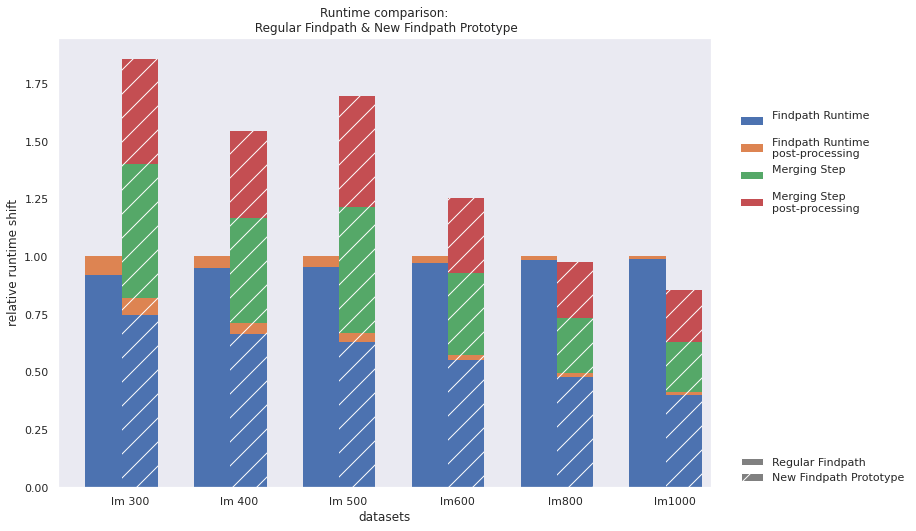

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# relative runtimes

normalize = True
# normalize = False

regular_findpath = []
new_findpath = []
add_to_plot("local_min_300_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_400_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_500_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_600_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_800_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_1000_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)

# axis setup
all_indeces = ["Findpath Runtime\n", "Findpath Runtime\npost-processing", "Merging Step\n", "Merging Step\npost-processing"]
all_datasets=["lm 300", "lm 400", "lm 500", "lm600", "lm800", "lm1000"]

# regular findpath
df1 = pd.DataFrame(regular_findpath, index=all_datasets, columns=all_indeces)
# New Findpath Prototype
df2 = pd.DataFrame(new_findpath, index=all_datasets, columns=all_indeces)

# stackoverflow function
plot_clustered_stacked([df1, df2],["Regular Findpath", "New Findpath Prototype"], title="Runtime comparison:\n Regular Findpath & New Findpath Prototype")
plt.ylabel('relative runtime shift')
plt.xlabel('datasets')
plt.savefig("runtimes_1_relative.png", bbox_inches='tight')
plt.savefig("runtimes_1_relative.svg", bbox_inches='tight')

dataset local_min_300_multiple_sections_min10.csv_benchmark.csv

dataset local_min_400_multiple_sections_min10.csv_benchmark.csv

dataset local_min_500_multiple_sections_min10.csv_benchmark.csv

dataset local_min_600_multiple_sections_min10.csv_benchmark.csv

dataset local_min_800_multiple_sections_min10.csv_benchmark.csv

dataset local_min_1000_multiple_sections_min10.csv_benchmark.csv



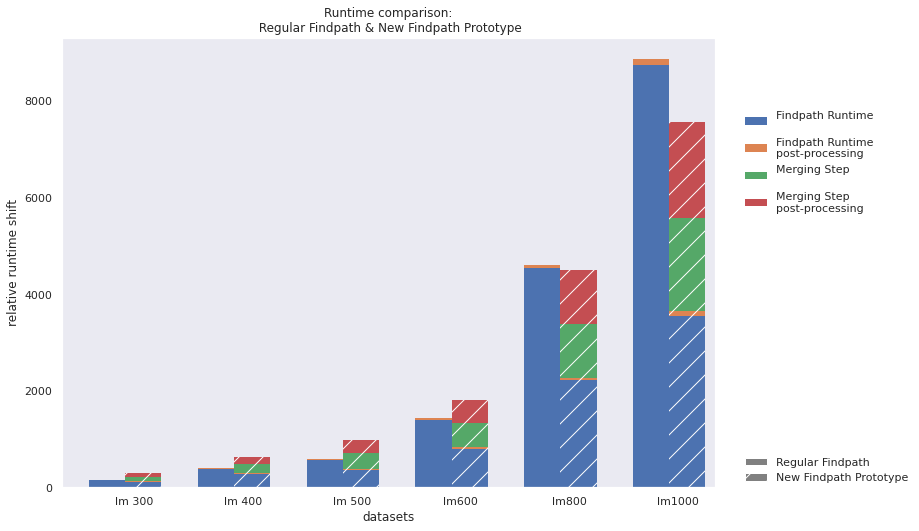

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# relative runtimes

# normalize = True
normalize = False

regular_findpath = []
new_findpath = []
add_to_plot("local_min_300_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_400_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_500_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_600_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_800_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)
add_to_plot("local_min_1000_multiple_sections_min10.csv_benchmark.csv", normalize=normalize)

# axis setup
all_indeces = ["Findpath Runtime\n", "Findpath Runtime\npost-processing", "Merging Step\n", "Merging Step\npost-processing"]
all_datasets=["lm 300", "lm 400", "lm 500", "lm600", "lm800", "lm1000"]

# regular findpath
df1 = pd.DataFrame(regular_findpath, index=all_datasets, columns=all_indeces)
# New Findpath Prototype
df2 = pd.DataFrame(new_findpath, index=all_datasets, columns=all_indeces)

# stackoverflow function
plot_clustered_stacked([df1, df2],["Regular Findpath", "New Findpath Prototype"], title="Runtime comparison:\n Regular Findpath & New Findpath Prototype")
plt.ylabel('relative runtime shift')
plt.xlabel('datasets')
plt.savefig("runtimes_1_total.png", bbox_inches='tight')
plt.savefig("runtimes_1_total.svg", bbox_inches='tight')

# Barrier energy comparison

input: local_min_300_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 12.98 kcal/mol
input: local_min_300_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 12.45 kcal/mol

input: local_min_400_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 15.33 kcal/mol
input: local_min_400_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 14.21 kcal/mol

input: local_min_500_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 14.57 kcal/mol
input: local_min_500_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 13.55 kcal/mol

input: local_min_600_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 17.39 kcal/mol
input: local_min_600_multiple_sections_min10.csv_benchmark.csv,     new findpath mean barrier: 14.95 kcal/mol

input: local_min_800_multiple_sections_min10.csv_benchmark.csv, regular findpath mean barrier: 23.78 kcal/mol
input:

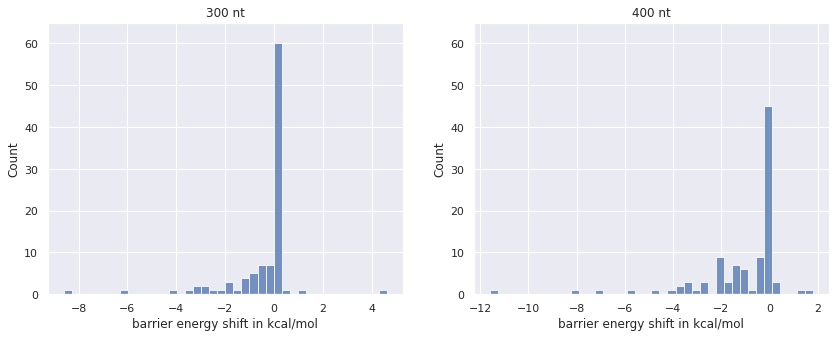

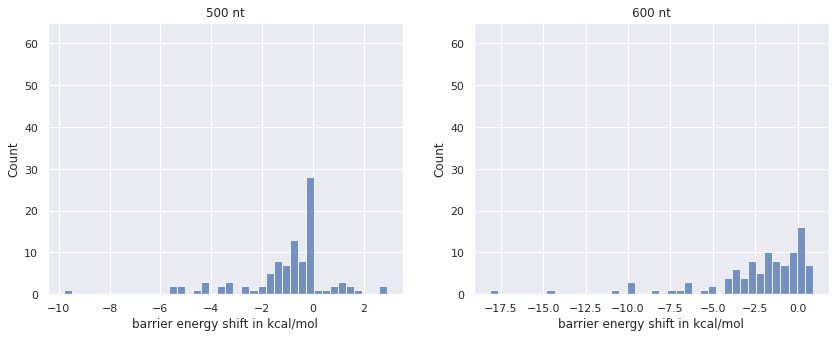

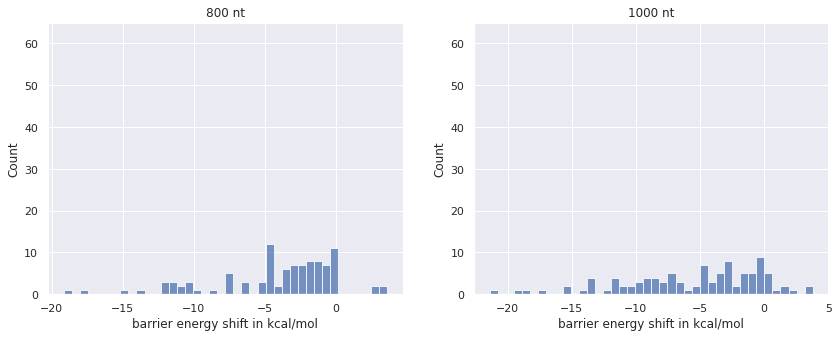

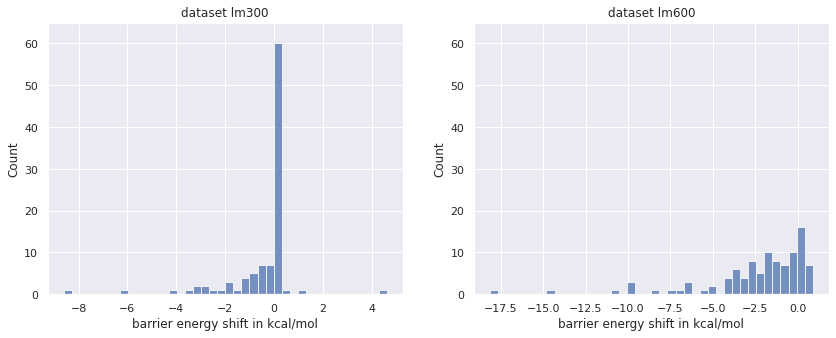

In [45]:
sns.set(rc={'figure.figsize':(14,5)})

def add_to_histogram(filename, target_axis):   
    # saddle energy comparisons
    regular_findpath = []
    new_findpath = []
    
    df = pd.read_csv(filename)
    
    print (f"input: {filename}, regular findpath mean barrier: {df['results_barrier_findpath'].mean():2.2f} kcal/mol")
    print (f"input: {filename},     new findpath mean barrier: {df['results_barrier_merge'].mean():2.2f} kcal/mol")
    print ()

    barrier_energy_change = df["results_barrier_merge"] - df["results_barrier_findpath"]
    
    axes[target_axis].set(xlabel="barrier energy shift in kcal/mol", ylim=(0, 65))
    sns.histplot(barrier_energy_change, bins=40, ax=axes[target_axis])

    
fig, axes=plt.subplots(1,2)
filename = "local_min_300_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 0)
filename = "local_min_400_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 1)
axes[0].set(title="300 nt")
axes[1].set(title="400 nt")

fig, axes=plt.subplots(1,2)
filename = "local_min_500_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 0)
filename = "local_min_600_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 1)
axes[0].set(title="500 nt")
axes[1].set(title="600 nt")

fig, axes=plt.subplots(1,2)
filename = "local_min_800_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 0)
filename = "local_min_1000_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 1)
axes[0].set(title="800 nt")
axes[1].set(title="1000 nt")
# plt.savefig("energy_comparison_300.svg", bbox_inches='tight')

fig, axes=plt.subplots(1,2)
filename = "local_min_300_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 0)
filename = "local_min_600_multiple_sections_min10.csv_benchmark.csv"
add_to_histogram(filename, 1)
axes[0].set(title="dataset lm300")
axes[1].set(title="dataset lm600")
# plt.savefig("energy_comparison_300_600.svg", bbox_inches='tight')
plt.savefig("energy_comparison_300_600.png", dpi=300, bbox_inches='tight')

# Indirect Paths

- better neighbour search 
- search width experiments
-- start with low sw, gradually increase sw...
- final search width: not necessarily higher than direct fp

In [1]:
import os
os.chdir("../../../pathfinder_i")
import pathfinder_i_2
# import merge_composition
os.chdir("../pathfinder/documents/benchmarks")

In [3]:
# rna2dfold example
sequence = "GGGCGCGGUUCGCCCUCCGCUAAAUGCGGAAGAUAAAUUGUGUCU"
s1 = "(((((.....)))))(((((.....)))))(((((.....)))))"
s2 = "((((((((((.....(((((.....))))).....))))))))))"

# sequence = "GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG"
# s1 = "((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).))....."
# s2 = "((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))....."

add_moves=[]

section = ()
search_width = 20
Verbose = True
# Debug = True
Debug = False

indirect_iterations = 1

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
search_width=search_width, Debug=Debug, Verbose=Verbose)

Iteration 0 launching findpath with addtional moves: set()
New best result:  -5.00 kcal/mol | B:  13.10 kcal/mol | E[start]:-18.10 E[end]:-17.70 | additional moves: []
GGGCGCGGUUCGCCCUCCGCUAAAUGCGGAAGAUAAAUUGUGUCU
(((((.....)))))(((((.....)))))(((((.....))))) [   0,    0 ] -18.10
(((((.....)))))(((((.....))))).((((.....)))). [ -31,  -45 ] -17.20
(((((.....)))))(((((.....))))).(((.......))). [ -35,  -41 ] -15.90
(((((.....)))))(((((.....))))).((.........)). [ -34,  -42 ] -13.90
(((((.....)))))(((((.....))))).(...........). [ -33,  -43 ] -12.70
(((((.....)))))(((((.....)))))............... [ -32,  -44 ] -16.80
((((.......))))(((((.....)))))............... [  -5,  -11 ] -15.10
.(((.......))).(((((.....)))))............... [  -1,  -15 ] -11.60
..((.......))..(((((.....)))))............... [  -2,  -14 ]  -8.30
...(.......)...(((((.....)))))............... [  -3,  -13 ]  -5.00
...............(((((.....)))))............... [  -4,  -12 ]  -8.40
.....(.........(((((.....))))).........)..... [  

## Example 2

path.001.007.txt Barriers output
```
..(((((((..((((((......(((((.((((........)))).)))))))))))......))))))) (-18.00) L0007
..(((((((..((((((.......((((.((((........)))).)))).))))))......))))))) (-15.50) I    
..(((((((..((((((........(((.((((........)))).)))..))))))......))))))) (-13.70) I    
..(((((((..((((((.........((.((((........)))).))...))))))......))))))) (-11.70) S    
..(((((((..((((((...((....((.((((........)))).)))).))))))......))))))) (-12.80) I    
..(((((((..(((((((((.....))).((((........))))......))))))......))))))) (-11.10) S    
..(((((((..((((((...((.((....((((........)))))).)).))))))......))))))) (-11.20) I    
..(((((((..((((((...(((((....((((........))))))))).))))))......))))))) (-16.70) L0040
..(((((((..((((((...(((((.....(((........))).))))).))))))......))))))) (-12.90) I    
..(((((((..((((((...(((((......((........))..))))).))))))......))))))) (-11.90) I    
..(((((((..((((((...(((((....................))))).))))))......))))))) (-11.00) S    
..(((((((..((((((...(((((...((......)).......))))).))))))......))))))) (-12.50) I    
..(((((((..((((((...(((((..(((......)))......))))).))))))......))))))) (-16.10) I    
..(((((((..((((((...(((((.((((......)))).....))))).))))))......))))))) (-17.80) I    
..(((((((..((((((...((((..((((......))))......)))).))))))......))))))) (-18.00) L0006
..(((((((..((((((...(((...((((......)))).......))).))))))......))))))) (-17.10) I    
..(((((((..((((((...((....((((......))))........)).))))))......))))))) (-14.00) S    
..(((((((..((((((.........((((......))))...........))))))......))))))) (-15.80) I    
..(((((((..((((((....((...((((......))))....)).....))))))......))))))) (-17.10) I    
..(((((((..((((((...(((...((((......))))....)))....))))))......))))))) (-18.70) L0001
```

In [6]:

sequence = "CGGUUUGUGAGUUCUAGUGUGACGGGCGCCUCCAUUGGCGGGGAGUUGUCUCUGGAGUAUAUGCGCGGAC"
s1 = "..(((((((..((((((......(((((.((((........)))).)))))))))))......)))))))"
s2 = "..(((((((..((((((...(((...((((......))))....)))....))))))......)))))))"


add_moves=[]
section = ()
search_width = 10
Verbose = True
# Debug = True
Debug = False

indirect_iterations = 2

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
search_width=search_width, Debug=Debug, Verbose=Verbose)

Iteration 0 launching findpath with addtional moves: set()
New best result:  -4.90 kcal/mol | B:  13.10 kcal/mol | E[start]:-18.00 E[end]:-18.70 | additional moves: []
call find_stack for best path
common:
..(((((((..((((((..................................))))))......)))))))
saddle structure: [0, 0, 0, 70, 69, 68, 67, 66, 65, 64, 0, 0, 57, 56, 55, 54, 53, 52, 0, 0, 0, 47, 46, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 0, 0, 0, 0, 0, 0, 0, 0, 33, 0, 0, 23, 22, 21, 0, 0, 0, 0, 17, 16, 15, 14, 13, 12, 0, 0, 0, 0, 0, 0, 9, 8, 7, 6, 5, 4, 3]
..(((((((..((((((...(((.........(........)..)))....))))))......)))))))
s1s2
..(((((((..((((((......(((((.((((........)))).)))))))))))......)))))))
..(((((((..((((((...(((...((((......))))....)))....))))))......)))))))
bfs done
..(((((((..((((((...(((((.(.((.((...)).)).)..))))).))))))......))))))) -11.930000000000001 -18.6 [(21, 50), (22, 49), (23, 48), (24, 47), (25, 46), (27, 43), (29, 41), (30, 40), (32, 38), (33, 37)]
..(((((((..((((((...(((((...(((((...)).


```
GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG
((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))..... (-16.30) L0004
((.(((((.((.((..((((((((....((.....))......))))).)))..)).))........))))).))..... (-14.50) I    
((.((((..((.((..((((((((....((.....))......))))).)))..)).)).........)))).))..... (-12.90) S    
((.((((((((.((..((((((((....((.....))......))))).)))..)).))...))....)))).))..... (-14.00) I    
...((((((((.((..((((((((....((.....))......))))).)))..)).))...))....))))........ (-13.20) I    
....(((((((.((..((((((((....((.....))......))))).)))..)).))...))....)))......... (-12.30) I    
.....((((((.((..((((((((....((.....))......))))).)))..)).))...))....)).......... (-10.70) S    
.......((((.((..((((((((....((.....))......))))).)))..)).))...))................ (-11.40) I    
......(((((.((..((((((((....((.....))......))))).)))..)).))...)))............... (-13.30) I    
.((...(((((.((..((((((((....((.....))......))))).)))..)).))...))).))............ (-13.30) I    
.(((..(((((.((..((((((((....((.....))......))))).)))..)).))...))))))............ (-13.90) I    
.((...(((((.((..((((((((....((.....))......))))).)))..)).))...))).))............ (-13.30) I    
......(((((.((..((((((((....((.....))......))))).)))..)).))...)))............... (-13.30) I    
.......((((.((..((((((((....((.....))......))))).)))..)).))...))................ (-11.40) I    
.........((.((..((((((((....((.....))......))))).)))..)).))..................... (-11.20) S    
.....((..((.((..((((((((....((.....))......))))).)))..)).))))................... (-11.60) I    
((...((..((.((..((((((((....((.....))......))))).)))..)).)))).))................ (-13.00) I    
((...((.....((..((((((((....((.....))......))))).)))..))...)).))................ (-11.80) S    
((...((.((..((..((((((((....((.....))......))))).)))..)))).)).))................ (-15.30) L0038
.....((.((..((..((((((((....((.....))......))))).)))..)))).))................... (-13.90) S    
.....((.((..((..((((((((....((.....))......))))).)))..)))).)).((....)).......... (-14.20) I    
.....((.((..((..((((((((....((.....))......))))).)))..)))).))(((....)))......... (-15.50) L0031
.....((.....((..((((((((....((.....))......))))).)))..))...))(((....)))......... (-12.00) S    
.....((..((.((..((((((((....((.....))......))))).)))..)).))))(((....)))......... (-13.20) I    
.........((.((..((((((((....((.....))......))))).)))..)).))..(((....)))......... (-12.80) S    
.........((.((..((((((((....((.....))......))))).)))..)).)).((((....))))........ (-14.50) I    
............((..((((((((....((.....))......))))).)))..))....((((....))))........ (-12.00) S    
............((..((((((((....((.....))......))))).)))..)).((.((((....))))..)).... (-13.00) I    
............((..((((((((....((.....))......))))).)))..))(((.((((....))))..)))... (-14.50) I    
............((..((((((((....((.....))......))))).)))..))((((((((....)))).))))... (-14.60) I    
................((((((((....((.....))......))))).)))....((((((((....)))).))))... (-10.90) S    
.....((.....))..((((((((....((.....))......))))).)))....((((((((....)))).))))... (-11.90) I    
....(((.....))).((((((((....((.....))......))))).)))....((((((((....)))).))))... (-15.70) L0020
....(((.....))).((.(((((....((.....))......)))))..))....((((((((....)))).))))... (-14.10) I    
....(((.....)))....(((((....((.....))......)))))........((((((((....)))).))))... (-14.00) I    
....(((.....)))....(((((...................)))))........((((((((....)))).))))... (-13.00) I    
....(((.....)))....((((.....................))))........((((((((....)))).))))... (-11.70) I    
....(((.....)))....(((.......................)))........((((((((....)))).))))... (-10.40) I    
....(((.....)))....((.........................))........((((((((....)))).))))... ( -9.60) S    
....(((.....))).........................................((((((((....)))).))))... (-10.70) I    
....(((.....)))...............................((......))((((((((....)))).))))... (-12.60) I    
((..(((.....)))....)).........................((......))((((((((....)))).))))... (-12.90) I    
....(((.....)))...............................((......))((((((((....)))).))))... (-12.60) I    
....(((.....))).............((.....)).........((......))((((((((....)))).))))... (-10.60) I    
((..(((.....))).............((.....)).))......((......))((((((((....)))).))))... (-10.50) S    
(((.(((.....))).............((.....)))))......((......))((((((((....)))).))))... (-11.90) I    
(((.(((.....)))......................)))......((......))((((((((....)))).))))... (-11.40) S    
(((.(((.....))).....((..........))...)))......((......))((((((((....)))).))))... (-11.70) I    
(((((((.....))).....((..........))..))))......((......))((((((((....)))).))))... (-12.60) I    
(((((((.....))).....................))))......((......))((((((((....)))).))))... (-13.20) I    
(((((((.....))).((........))........))))......((......))((((((((....)))).))))... (-11.50) S    
(((((((.....))).(((......)))........))))......((......))((((((((....)))).))))... (-12.70) I    
((((.((.....))..(((......)))........))))......((......))((((((((....)))).))))... ( -8.90) S    
(((((((.....))..(((......))).......)))))......((......))((((((((....)))).))))... (-11.00) I    
(((((((.....))..((........)).......)))))......((......))((((((((....)))).))))... ( -9.80) S    
(((((((.....)).....................)))))......((......))((((((((....)))).))))... (-12.40) I    
(((((..............................)))))......((......))((((((((....)))).))))... (-11.00) I    
(((((........((..................)))))))......((......))((((((((....)))).))))... ( -9.90) S    
(((((........(((................))))))))......((......))((((((((....)))).))))... (-11.10) I    
(((((........((((..............)))))))))......((......))((((((((....)))).))))... (-12.30) I    
(((((........((((.((.........)))))))))))......((......))((((((((....)))).))))... (-12.50) I    
((((.........((((.((.........)))))).))))......((......))((((((((....)))).))))... ( -8.70) S    
((((........(((((.((.........)))))))))))......((......))((((((((....)))).))))... (-11.90) I    
(((.........(((((.((.........))))))).)))......((......))((((((((....)))).))))... (-10.00) S    
(((........((((((.((.........)))))))))))......((......))((((((((....)))).))))... (-12.60) I    
((.........((((((.((.........)))))))).))......((......))((((((((....)))).))))... ( -9.70) S    
((........(((((((.((.........)))))))))))......((......))((((((((....)))).))))... (-12.00) I    
..........(((((((.((.........)))))))))........((......))((((((((....)))).))))... (-12.30) I    
.......((.(((((((.((.........)))))))))))......((......))((((((((....)))).))))... (-14.70) I    
.......((.(((((((.((.........))))))))))).....(((......)))(((((((....)))).))).... (-13.20) S    
.......((.(((((((.((.........))))))))))).....(((......)))((.((((....))))..)).... (-13.10) I    
.......((.(((((((.((.........))))))))))).....(((......)))...((((....))))........ (-12.10) I    
.......((.(((((((.((.........))))))))))).....(((......)))....(((....)))......... (-10.40) I    
.......((.(((((((.((.........))))))))))).....(((......))).....((....)).......... ( -9.10) I    
.......((.(((((((.((.........))))))))))).....(((......)))....................... ( -8.80) I    
.......((.(((((((.((.........))))))))))).....(((......)))((....))............... ( -8.20) S    
.......((.(((((((.((.........)))))))))))......((......))(((....))).............. ( -9.70) I    
.....((((.(((((((.((.........)))))))))))......((......))(((....)))..)).......... ( -9.90) I    
....(((((.(((((((.((.........)))))))))))......((......))(((....)))..)))......... (-11.50) I    
...((((((.(((((((.((.........)))))))))))......((......))(((....)))..))))........ (-12.40) I    
((.((((((.(((((((.((.........)))))))))))......((......))(((....)))..)))).))..... (-13.20) I    
((.((((...(((((((.((.........)))))))))........((......))(((....)))..)))).))..... (-10.80) S    
((.(((((..(((((((.((.........)))))))))........((......))(((....))).))))).))..... (-13.20) I    
((.((((((.(((((((.((.........)))))))))........((......))(((....))))))))).))..... (-13.40) I    
((.((((((.(((((((.((.........)))))))))..................(((....))))))))).))..... (-10.60) S    
((.((((((.(((((((.((.........)))))))))((......))........(((....))))))))).))..... (-12.40) I    
((.((((((.(((((((.((.........)))))))))(((....)))........(((....))))))))).))..... (-13.10) I    
((.((((((.(((((((.((.........)))))))))(((....))).........((....)).)))))).))..... (-11.60) I    
((.((((((.(((((((.((.........)))))))))(((....)))..................)))))).))..... (-11.30) S    
((.((((((.(((((((.((.........)))))))))(((....)))...((....)).......)))))).))..... (-11.90) I    
((.(((((..(((((((.((.........)))))))))(((....)))...((....))........))))).))..... (-11.70) S    
((.((((((((((((((.((.........)))))))))(((....)))...((....)).....)).))))).))..... (-11.90) I    
((.((((((((((((((.((.........)))))))))((......))...((....)).....)).))))).))..... (-11.20) I    
((.((((((((((((((.((.........))))))))).............((....)).....)).))))).))..... ( -9.40) S    
((.((((((((((((((.((.........))))))))).........((..((....))...)))).))))).))..... (-11.30) I    
((.((((((((((((((.((.........))))))))).........(((.((....))..))))).))))).))..... (-13.00) I    
((.(((((..(((((((.((.........))))))))).........(((.((....))..)))...))))).))..... (-12.80) I    
((.((((...(((((((.((.........))))))))).........(((.((....))..)))....)))).))..... (-10.40) S    
((.((((((.(((((((.((.........))))))))))).......(((.((....))..)))....)))).))..... (-12.80) I    
((.((((((.(((((((.((.........)))))))))))..((...(((.((....))..)))..)))))).))..... (-12.40) S    
((.((((((.(((((((.((.........)))))))))))..(((..(((.((....))..))).))))))).))..... (-14.00) I    
((.((((((.(((((((.((.........)))))))))))..((((.(((.((....))..))))))))))).))..... (-14.90) I    
((.((((((.(((((((.((.........)))))))))))..((((.((..((....))...)))))))))).))..... (-13.20) I    
((.((((((.(((((((.((.........)))))))))))..((((.....((....)).....)))))))).))..... (-11.50) S    
((.((((((.(((((((.((.........)))))))))))..(((((....((....))....))))))))).))..... (-13.80) I    
((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).))..... (-18.40) L0001
```

In [40]:
sequence = "GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG"
s1 = "((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))....."
s2 = "((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).))....."


add_moves=[]
section = ()
search_width = 500
Verbose = True
# Debug = True
Debug = False

indirect_iterations = 2

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
search_width=search_width, Debug=Debug, Verbose=Verbose)

Iteration 0 launching findpath with addtional moves: set()
New best result:  -0.90 kcal/mol | B:  15.40 kcal/mol | E[start]:-16.30 E[end]:-18.40 | additional moves: []
call find_stack for best path
common:
((.((((.............................................................)))).)).....
saddle structure: [0, 75, 74, 0, 72, 71, 70, 69, 68, 67, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 45, 44, 0, 0, 0, 0, 37, 36, 0, 0, 0, 0, 0, 30, 29, 0, 0, 0, 0, 0, 0, 24, 23, 22, 0, 63, 0, 0, 0, 59, 58, 0, 0, 0, 0, 53, 52, 0, 0, 0, 48, 0, 0, 0, 9, 8, 7, 6, 5, 4, 0, 2, 1, 0, 0, 0, 0, 0]
((.((((((............(((....((.....))......))).(...((....))...)...)))))).)).....
s1s2
((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).)).....
((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).)).....
bfs done
((.((((((....((.((....((((..................)))).....)).))....))....)))).))..... -3.8599999999999994 -4.6 [(8, 64), (9, 63), (14, 58), (15, 57), (17, 55), (18, 54), (23, 

In [48]:
sequence = "GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG"
s1 = "((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))....."
s2 = "((.((((((.(((((((.((.........)))))))))))..((((((...((....))...)))))))))).))....."


add_moves=[]
section = ()
search_width = 500
Verbose = True
# Debug = True
Debug = False

indirect_iterations = 1

paths = pathfinder_i_2.find_path(sequence, s1, s2, indirect_iterations=indirect_iterations, add_moves=add_moves,
search_width=search_width, Debug=Debug, Verbose=Verbose)

Iteration 0 launching findpath with addtional moves: set()
New best result:  -0.90 kcal/mol | B:  15.40 kcal/mol | E[start]:-16.30 E[end]:-18.40 | additional moves: []
GGAAGCCGGCGAGGCAGUACCAUUAUAUAGUUUGUCUUCCAAGAAUGGGUACGACCGCGGGACCGUUCGGUUAUCGUCUG
((.((((((((.((..((((((((....((.....))......))))).)))..)).)).......)))))).))..... [   0,    0 ] -16.30
((.(((((((..((..((((((((....((.....))......))))).)))..))..).......)))))).))..... [ -11,  -58 ] -13.20
((.((((((...((..((((((((....((.....))......))))).)))..))..........)))))).))..... [ -10,  -59 ] -13.40
((.((((((....(..((((((((....((.....))......))))).)))..)...........)))))).))..... [ -13,  -56 ]  -9.00
((.((((((.......((((((((....((.....))......))))).)))..............)))))).))..... [ -14,  -55 ]  -9.20
((.((((((.......((.(((((....((.....))......)))))..))..............)))))).))..... [ -19,  -50 ]  -7.60
((.((((((.......(..(((((....((.....))......)))))...)..............)))))).))..... [ -18,  -51 ]  -5.90
((.((((((..........(((((....((.....))

# Better optimal paths example

In [351]:
import sys
sys.path.append('../pathfinder/src')
import helper





s1 = "....((((((.......)))...)))((((..(............................)...))))."
s2 = ".(((((((........)))..)))).((((..(............................)...))))."

# Findpath outer section: [1, 70] excluding [[33, 62]] 

print ()
print ("Findpath outer section: [1, 70] excluding [[33, 62]]")


moves = [(0, 0), (-5, -26), (-8, -20), (-9, -19), (-10, -18), (-6, -25), (-7, -24), (8, 17), (7, 18), (6, 19), (2, 25), (3, 24), (4, 23), (5, 22)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[94m")

print ()
print ("Findpath outer section: [1, 70] excluding [[33, 62]]")

moves = [(0, 0), (-8, -20), (-9, -19), (-10, -18), (-5, -26), (-6, -25), (-7, -24), (8, 17), (7, 18), (6, 19), (2, 25), (3, 24), (4, 23), (5, 22)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[94m")


# Findpath inner section: [33, 62] 

s1 = "................................(((...((((((((...))))).))).)))........"
s2 = "................................(((..((..(((((...))))).))..)))........"

print ()
print ("Findpath inner section: [33, 62] ")

moves = [(0, 0), (-41, -56), (-40, -57), (-39, -58),  (38, 57), (39, 56)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[92m")


sequence = "GGUAUGCUGCCUAUAAAGUAAGUGCACUGAUCUACAAGCAUAAGCGGGACGCUUCGUGAGUACAUUCAGA"
s1 = "....((((((.......)))...)))((((..(((...((((((((...))))).))).)))...))))."
s2 = ".(((((((........)))..)))).((((..(((..((..(((((...))))).))..)))...))))."

print ()
print ("Merging results: Inner section [[33, 62]] + outer section [1, 70] ")

moves = [(0, 0), (-41, -56), (-40, -57), (-39, -58), (-5, -26), (38, 57), (39, 56), (-8, -20), (-9, -19), (-10, -18), (-6, -25), (-7, -24), (8, 17), (7, 18), (6, 19), (2, 25), (3, 24), (4, 23), (5, 22)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[91m")

print ()
print ("Merging results: Inner section [[33, 62]] + outer section [1, 70] ")

moves = [(0, 0), (-8, -20), (-9, -19), (-10, -18), (-41, -56), (-40, -57), (-39, -58), (-5, -26), (38, 57), (39, 56), (-6, -25), (-7, -24), (8, 17), (7, 18), (6, 19), (2, 25), (3, 24), (4, 23), (5, 22)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[96m")




Findpath outer section: [1, 70] excluding [[33, 62]]
GGUAUGCUGCCUAUAAAGUAAGUGCACUGAUCUACAAGCAUAAGCGGGACGCUUCGUGAGUACAUUCAGA
....((((((.......)))...)))((((..(............................)...)))). [   0,    0 ]   2.90
.....(((((.......)))...)).((((..(............................)...)))). [  -5,  -26 ]   3.60
.....((.((.......))....)).((((..(............................)...)))). [  -8,  -20 ]   5.40
.....((..(.......).....)).((((..(............................)...)))). [  -9,  -19 ]   6.70
.....((................)).((((..(............................)...)))). [ -10,  -18 ]   3.30
......(................)..((((..(............................)...)))). [  -6,  -25 ]   7.10
..........................((((..(............................)...)))). [  -7,  -24 ]   3.30
.......(........).........((((..(............................)...)))). [   8,   17 ]   6.80
......((........))........((((..(............................)...)))). [   7,   18 ]   4.10
.....(((........))).......((((..(..............

-6.0

# Suboptimal paths required...



In [441]:
sequence = "UGAAGACCCAUUGAGUAACGACACCGCACGGCGCAUGGCGUCAGAGUAGCACUGCCUCGU"
s1 =       "..........(.(.(...((....)).....).))........................."
s2 =       "..........(...((..((........))..)))........................."

print ()
print ("Findpath inner section: [11, 35]")
moves = [(0, 0), (-15, -32), (-13, -34), (-20, -25), (-19, -26), (19, 30), (20, 29), (15, 34), (16, 33)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[94m")


print ()
print ("Findpath inner section: [11, 35]")
moves = [(0, 0), (-15, -32), (-20, -25), (-19, -26), (19, 30), (20, 29), (-13, -34), (15, 34), (16, 33)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[94m")


s1 =       "....(((((((.......................)))).)))((.((......))))..."
s2 =       "....(((((((.......................)))).))).(((..((...))))).."

print ()
print ("Findpath outer section: [1, 60] excluding [[11, 35]] ")
moves = [(0, 0), (-43, -57), (-44, -56), (-47, -54), (-46, -55), (49, 55), (50, 54), (44, 58), (45, 57), (46, 56)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[92m")


print ()
print ("Findpath outer section: [1, 60] excluding [[11, 35]] ")
moves = [(0, 0), (-43, -57), (-44, -56), (44, 58), (45, 57), (-47, -54), (-46, -55), (46, 56), (49, 55,), (50, 54)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[92m")

s1 =       "....(((((((.(.(...((....)).....).))))).)))((.((......))))..."
s2 =       "....(((((((...((..((........))..)))))).))).(((..((...))))).."

print ()
print ("Merging results: Inner section [[11, 35]] + outer section [1, 60]")
moves = [(0, 0), (-15, -32), (-13, -34), (-43, -57), (-44, -56), (-47, -54), (-46, -55), (-20, -25), (-19, -26), (19, 30), (20, 29), (15, 34), (16, 33), (49, 55), (50, 54), (44, 58), (45, 57), (46, 56)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[96m")

print ()
print ("Merging results: Inner section [[11, 35]] + outer section [1, 60]")
moves = [(0, 0), (-15, -32), (-20, -25), (-19, -26), (19, 30), (20, 29), (-43, -57), (-44, -56), (44, 58), (45, 57), (-47, -54), (-46, -55), (46, 56), (49, 55,), (50, 54), (-13, -34), (15, 34), (16, 33)]
helper.print_moves(sequence, s1, s2,moves, move_color="\033[91m")




Findpath inner section: [11, 35]
UGAAGACCCAUUGAGUAACGACACCGCACGGCGCAUGGCGUCAGAGUAGCACUGCCUCGU
..........(.(.(...((....)).....).))......................... [   0,    0 ]   6.70
..........(.(.....((....)).......))......................... [ -15,  -32 ]   6.40
..........(.......((....))........)......................... [ -13,  -34 ]   5.80
..........(.......(......)........)......................... [ -20,  -25 ]   8.00
..........(.......................)......................... [ -19,  -26 ]   7.20
..........(.......(..........)....)......................... [  19,   30 ]   9.00
..........(.......((........))....)......................... [  20,   29 ]   6.00
..........(...(...((........))...))......................... [  15,   34 ]   6.60
..........(...((..((........))..)))......................... [  16,   33 ]   3.20
S:   9.00 kcal/mol | B:   2.30 kcal/mol | E[start]:  6.70 E[end]:  3.20

Findpath inner section: [11, 35]
UGAAGACCCAUUGAGUAACGACACCGCACGGCGCAUGGCGUCAGAGUAGCACUGCCUCGU


-2.5